# Optimization Project

## Comparison of SGD an SFW with different Learning Rates

In [1]:
!pip install ucimlrepo
!pip install --upgrade certifi
# !pip uninstall tensorflow
# !pip install tensorflow 2.13

In [42]:
import itertools
import ssl
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# The implementation of SFW is working Tensorflow >= 2.13 and Tensorflow <= 2.15
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


In [5]:
print("List GPU devices: ", tf.config.list_physical_devices('GPU'))

List GPU devices:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## A Simple DNN with 2 Hidden Layer on A Multivariate Dataset with 7 Classes

# Dry Bean Dataset Description

## Dataset Overview
- **Number of Instances:** 13,611
- **Number of Features:** 16
- **Feature Types:** Integer, Real
- **Subject Area:** Biology
- **Associated Tasks:** Classification
- **Data Type:** Multivariate

## Dataset Information
This dataset consists of images capturing 13,611 grains of seven different registered dry beans, taken with a high-resolution camera. The primary purpose of the dataset is to support classification tasks, specifically to distinguish between seven varieties of dry beans based on various features related to form, shape, type, and structure.

## Features
1. **Area (A):** The area of a bean zone and the number of pixels within its boundaries.
2. **Perimeter (P):** Bean circumference, defined as the length of its border.
3. **Major Axis Length (L):** Distance between the ends of the longest line that can be drawn from a bean.
4. **Minor Axis Length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. **Aspect Ratio (K):** Defines the relationship between L and l.
6. **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.
7. **Convex Area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. **Equivalent Diameter (Ed):** The diameter of a circle having the same area as a bean seed area.
9. **Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.
10. **Solidity (S):** Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
11. **Roundness (R):** Calculated with the formula: (4πA)/(P^2).
12. **Compactness (CO):** Measures the roundness of an object: Ed/L.
13. **ShapeFactor1 (SF1):** Feature.
14. **ShapeFactor2 (SF2):** Feature.
15. **ShapeFactor3 (SF3):** Feature.
16. **ShapeFactor4 (SF4):** Feature.

## Target Variable
- **Class:** Categorical variable indicating the type of dry bean. Possible classes are Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira.

## Units and Missing Values
- Units are specified for relevant features.
- No missing values are reported in the provided information.

## Dataset Creation and Purpose
This dataset was curated to develop a classification model capable of distinguishing between different varieties of dry beans based on high-resolution images and extracted features. The features include both geometrical dimensions and shape forms, providing a comprehensive set for robust classification.



In [6]:
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes) 
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

In [7]:
class_names = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']

In [8]:
X = X.values
y = y.values

In [9]:
def normalize_features(input_data):
    return StandardScaler().fit_transform(input_data)


def one_hot_label_encoder(input_data):
    return OneHotEncoder().fit_transform(input_data.reshape(-1, 1)).toarray()

In [10]:
X = normalize_features(X)
y = one_hot_label_encoder(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
def plot_loss_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    return


def plot_accuracy_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return


def plot_precision_curve(history):
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return


def plot_recall_curve(history):
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return


def plot_confusion_matrix(dnn_model, features, targets, classes, dataset):
    y_test_preds = dnn_model.predict(features, verbose='auto', steps=test_steps)
    y_test_preds = np.argmax(y_test_preds, axis=1)
    y_test = np.argmax(targets, axis=1)
    if dataset == 'cifar10':
        cm = confusion_matrix(y_test, y_test_preds, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    elif dataset == 'dry_bean':
        cm = confusion_matrix(y_test, y_test_preds, labels=[0, 1, 2, 3, 4, 5, 6])
    else:
        raise ValueError('dataset should be one of cifar10 or dry_bean.')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [13]:
batch_size = 32

train_steps = np.ceil(X_train.shape[0] / batch_size)
test_steps = np.ceil(X_test.shape[0] / batch_size)
val_steps = np.ceil(X_val.shape[0] / batch_size)

In [14]:
def get_f1_score(p, r):
    precision = p.result().numpy()
    recall = r.result().numpy()
    return 2 * (precision * recall) / (precision + recall)

In [15]:
def create_dnn_model(input_shape, num_of_hidden, units, activations, num_of_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_shape,)))
    for i in range(num_of_hidden):
        model.add(tf.keras.layers.Dense(units[i], activations[i]))
    if num_of_classes == 1:
        model.add(tf.keras.layers.Dense(num_of_classes, activation='linear'))
        return model
    elif num_of_classes == 2:
        model.add(tf.keras.layers.Dense(num_of_classes, activation='sigmoid'))
        return model
    model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))
    return model

In [16]:
def reset_model_parameters(model):
    for layer in model.layers:
        layer.set_weights([
            tf.keras.initializers.GlorotUniform()(shape=layer.get_weights()[0].shape),
            tf.zeros_like(layer.get_weights()[1])
        ])
    print('All model parameters have been reinitilized.')
    return

In [17]:
precision_metric = tf.keras.metrics.Precision()
recall_metric = tf.keras.metrics.Recall()

In [66]:
class PrintLearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        learning_rate = self.model.optimizer.lr.numpy()
        print(f"\nLearning Rate at the end of epoch {epoch + 1}: {learning_rate}\n")

In [19]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

### SGD as optimizer

In [20]:
model = create_dnn_model(input_shape=X_train.shape[1], num_of_hidden=2, units=[16, 8], activations=['relu', 'relu'],
                         num_of_classes=len(class_names))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [23]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20


I0000 00:00:1706811737.435725     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


263/273 [===========================>..] - ETA: 0s - loss: 1.6034 - accuracy: 0.4420 - precision: 0.9210 - recall: 0.1191
Learning Rate at the end of epoch 1: 0.009999999776482582

273/273 [==============================] - 3s 5ms/step - loss: 1.5891 - accuracy: 0.4459 - precision: 0.9202 - recall: 0.1271 - val_loss: 1.2144 - val_accuracy: 0.5418 - val_precision: 0.8771 - val_recall: 0.3278
Epoch 2/20
264/273 [============================>.] - ETA: 0s - loss: 0.9823 - accuracy: 0.6410 - precision: 0.8971 - recall: 0.3778
Learning Rate at the end of epoch 2: 0.009999999776482582

273/273 [==============================] - 1s 4ms/step - loss: 0.9784 - accuracy: 0.6440 - precision: 0.8969 - recall: 0.3775 - val_loss: 0.8314 - val_accuracy: 0.7314 - val_precision: 0.8932 - val_recall: 0.3802
Epoch 3/20
272/273 [============================>.] - ETA: 0s - loss: 0.6939 - accuracy: 0.7823 - precision: 0.9224 - recall: 0.5093
Learning Rate at the end of epoch 3: 0.009999999776482582

273/273 [

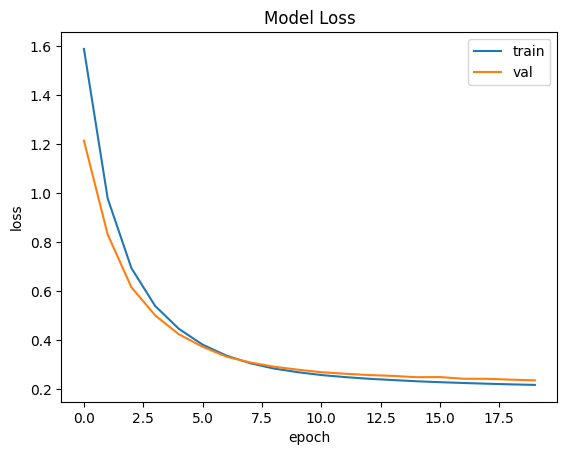

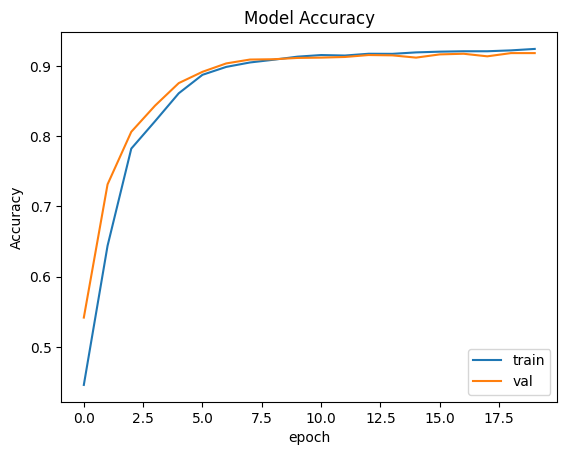

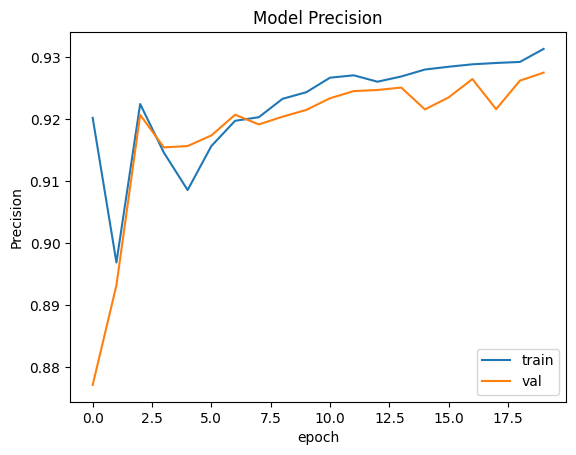

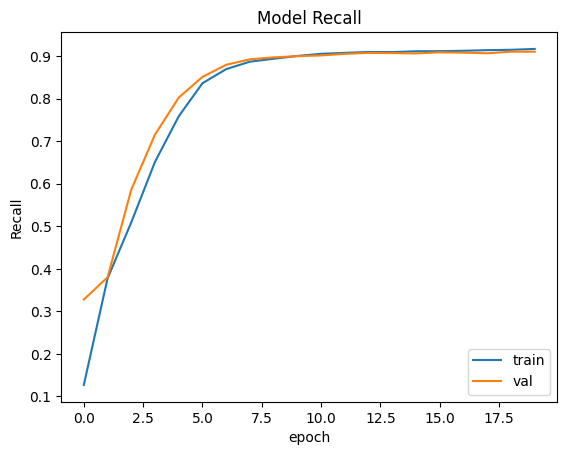

86/86 [==============================] - 0s 1ms/step


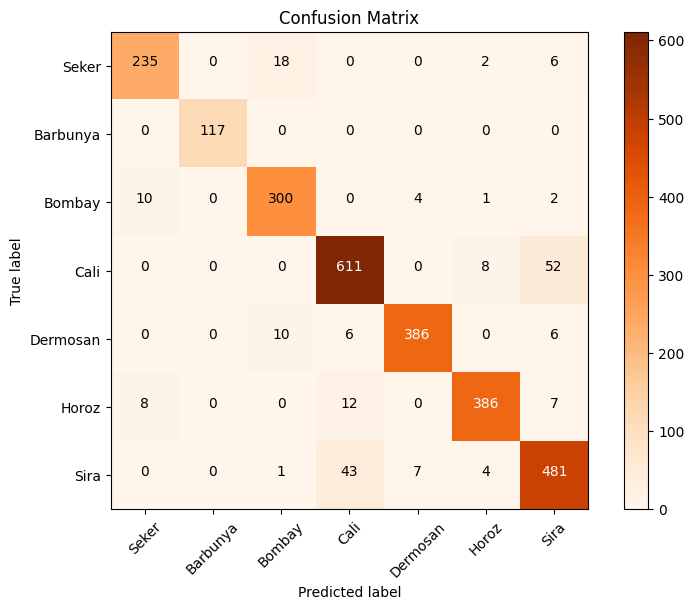

86/86 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9240 - precision: 0.9296 - recall: 0.9170
DNN model classifier evaluation results with SGD optimizer:

Test set Loss = 0.21987
Test set Accuracy = 0.92
Test set Precision = 0.93
Test set Recall = 0.92
Test set F1 Score = 0.92


In [24]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with SGD optimizer:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [37]:
reset_model_parameters(model)

All model parameters have been reinitilized.


### Stochastic Frank-Wolfe with L1 ball as feasible region as optimizer

In [52]:
class MyLearningRateSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, method, params):
        self.initial_learning_rate = initial_learning_rate
        self.method = method
        self.params = params

    def __call__(self, step):
        if self.method == "FIX":
            return self.initial_learning_rate

        elif self.method == "STEP":
            gamma = self.params.get("gamma")
            l = self.params.get("l")
            return self.initial_learning_rate * tf.pow(gamma, tf.math.floor(tf.cast(step, tf.float32) / l))

        elif self.method == "EXP":
            gamma = self.params.get("gamma")
            return self.initial_learning_rate * tf.pow(gamma, tf.cast(step, tf.float32))

        elif self.method == "INV":
            gamma = self.params.get("gamma")
            p = self.params.get("p")
            return self.initial_learning_rate / tf.pow((1 + (gamma * tf.cast(step, tf.float32))), p)

        elif self.method == "POLY":
            l = self.params.get("l")
            p = self.params.get("p")
            return self.initial_learning_rate * tf.pow((1 - (tf.cast(step, tf.float32) / l)), p)

        elif self.method in ["TRI", "TRI2", "TRIEXP", "SIN", "SIN2", "SINEXP", "COS"]:
            l = self.params.get("l")
            k0 = self.initial_learning_rate
            k1 = self.params.get("k1")
            gamma = self.params.get("gamma")
            if self.method == "TRI":
                return min(k0, k1) + (abs((k1 - k0)) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) * (2 / math.pi))

            elif self.method == "TRI2":
                return min(k0, k1) + (abs((k1 - k0)) * (1 / (
                    tf.pow(tf.cast(2, tf.float32), tf.math.floor(tf.cast(step, tf.float32) / (2 * l))))) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) * (2 / math.pi))

            elif self.method == "TRIEXP":
                return min(k0, k1) + (abs((k1 - k0)) * tf.pow(gamma, tf.cast(step, tf.float32)) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) * (2 / math.pi))

            elif self.method == "SIN":
                return min(k0, k1) + (
                        abs((k1 - k0)) * tf.abs(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l))))

            elif self.method == "SIN2":
                return min(k0, k1) + (abs((k1 - k0)) * (1 / (
                    tf.pow(tf.cast(2, tf.float32), tf.math.floor(tf.cast(step, tf.float32) / (2 * l))))) * tf.abs(
                    tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l))))

            elif self.method == "SINEXP":
                return min(k0, k1) + (abs((k1 - k0)) * tf.pow(gamma, tf.cast(step, tf.float32)) * tf.abs(
                    tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l))))

            elif self.method == "COS":
                return min(k0, k1) + (
                        abs((k1 - k0)) * 0.5 * (1 + tf.math.cos(math.pi * 2 * tf.cast(step, tf.float32) / l)))

        else:
            raise ValueError("The given method does not exist.")

    def get_config(self):
        return {
            'initial_learning_rate': self.initial_learning_rate,
            'method': self.method,
            'params': self.method
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [67]:
class StochasticFrankWolfe(tf.keras.optimizers.Optimizer):
    def __init__(
            self,
            learning_rate,
            momentum=0.1,
            nesterov=False,
            weight_decay=None,
            clipnorm=None,
            clipvalue=None,
            global_clipnorm=None,
            use_ema=False,
            ema_momentum=0.99,
            ema_overwrite_frequency=None,
            jit_compile=True,
            name="StochasticFrankWolfe",
            **kwargs
    ):
        super().__init__(
            name=name,
            weight_decay=weight_decay,
            clipnorm=clipnorm,
            clipvalue=clipvalue,
            global_clipnorm=global_clipnorm,
            use_ema=use_ema,
            ema_momentum=ema_momentum,
            ema_overwrite_frequency=ema_overwrite_frequency,
            jit_compile=jit_compile,
            **kwargs
        )
        self._learning_rate = self._build_learning_rate(learning_rate)
        self.momentum = momentum
        if isinstance(momentum, (int, float)) and (momentum < 0 or momentum > 1):
            raise ValueError("`momentum` must be between [0, 1].")

    def build(self, var_list):
        super().build(var_list)
        if hasattr(self, "_built") and self._built:
            return
        self._built = True
        self.momentums = []
        for var in var_list:
            self.momentums.append(
                self.add_variable_from_reference(
                    model_variable=var, variable_name="m"
                )
            )

    def update_step(self, gradient, variable):
        lr = tf.cast(self.learning_rate, variable.dtype)  # Corresponds to αt in Algorithm 1
        local_step = tf.cast(self.iterations + 1, variable.dtype)  # Corresponds to t in Algorithm 1

        # Compute the step size as learning rate divided by the iteration count
        step_size = lr / local_step  # This is a common way to decay the learning rate in stochastic optimization algorithms

        momentum = tf.cast(self.momentum, variable.dtype)  # Corresponds to ρt in Algorithm

        # Get the momentum variable for this variable
        m = self.momentums[self._index_dict[self._var_key(variable)]]  # Corresponds to mt in Algorithm

        # Scale the gradient by its L1 norm
        scaled_gradient = gradient / tf.norm(gradient,
                                             ord=1)  # This is a specific choice made in our implementation, not directly specified in Algorithm

        # Update the momentum variable with the current gradient and the previous momentum
        m.assign((1. - momentum) * m + momentum * scaled_gradient)  # Corresponds to Line 5 in Algorithm

        # Compute the direction of the update as the sign of the negative momentum
        v = tf.sign(-m)  # Corresponds to Line 6 in Algorithm, assuming the feasible region C is the L1 ball

        # Perform the update
        if isinstance(gradient, tf.IndexedSlices):
            # If the gradient is sparse, perform a sparse update
            indices = gradient.indices
            updates = step_size * (v - variable)  # Corresponds to Line 7 in Algorithm
            variable.scatter_nd_update(indices[:, None],
                                       updates)  # This is a TensorFlow-specific way to handle sparse updates
        else:
            # If the gradient is dense, perform a dense update
            variable.assign_add(step_size * (v - variable))  # Corresponds to Line 7 in Algorithm

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "learning_rate": self._serialize_hyperparameter(
                    self._learning_rate
                ),
                "momentum": self.momentum,
            }
        )
        return config

In [73]:
#FIX
model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='FIX', params={})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [74]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/40
273/273 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.7432 - precision: 0.8711 - recall: 0.6895
Learning Rate at the end of epoch 1: 0.10000000149011612

273/273 [==============================] - 2s 4ms/step - loss: 0.6472 - accuracy: 0.7432 - precision: 0.8711 - recall: 0.6895 - val_loss: 0.5146 - val_accuracy: 0.8173 - val_precision: 0.8526 - val_recall: 0.7039
Epoch 2/40
261/273 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.8357 - precision: 0.8703 - recall: 0.7404
Learning Rate at the end of epoch 2: 0.10000000149011612

273/273 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.8377 - precision: 0.8711 - recall: 0.7426 - val_loss: 0.4516 - val_accuracy: 0.8503 - val_precision: 0.8753 - val_recall: 0.7571
Epoch 3/40
262/273 [===========================>..] - ETA: 0s - loss: 0.4270 - accuracy: 0.8601 - precision: 0.8890 - recall: 0.7883
Learning Rate at the end of epoch 3: 0.10000000149011612

2

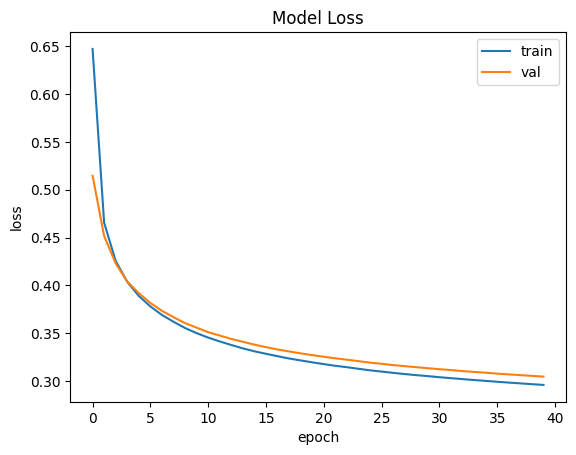

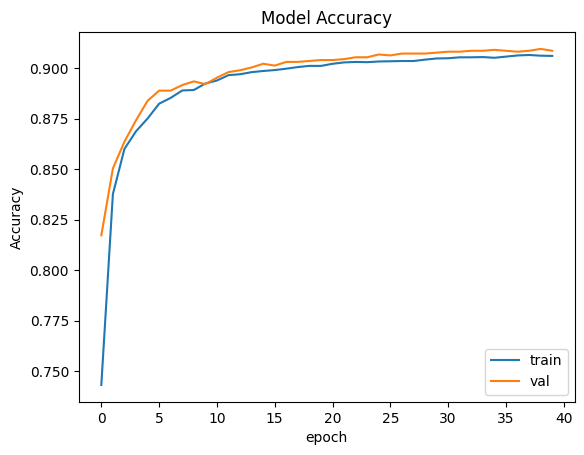

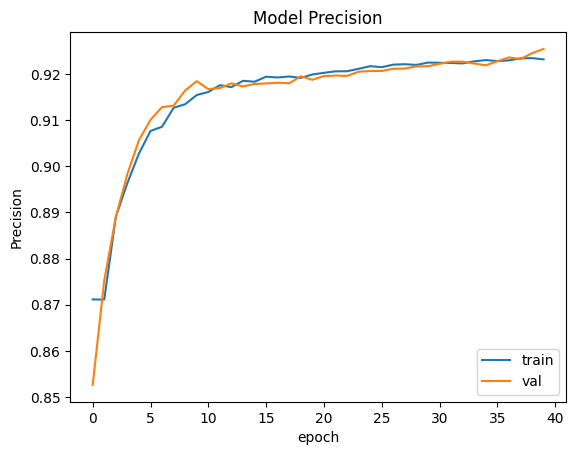

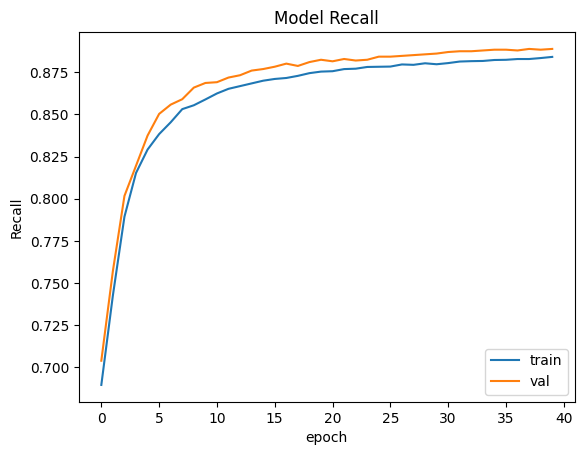

86/86 [==============================] - 0s 1ms/step


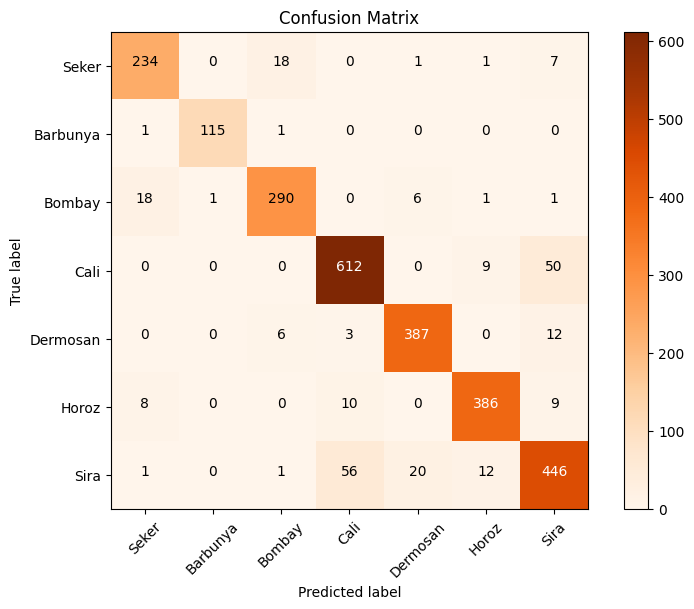

86/86 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9071 - precision: 0.9208 - recall: 0.8884
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:

Test set Loss = 0.29729
Test set Accuracy = 0.91
Test set Precision = 0.92
Test set Recall = 0.89
Test set F1 Score = 0.90


In [75]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [104]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [105]:
#EXP
model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.2, method='EXP', params={'gamma': 0.9999})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [106]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
268/273 [============================>.] - ETA: 0s - loss: 0.1747 - accuracy: 0.7561 - precision: 0.8349 - recall: 0.7161
Learning Rate at the end of epoch 1: 0.1946321725845337

273/273 [==============================] - 2s 5ms/step - loss: 0.1741 - accuracy: 0.7567 - precision: 0.8344 - recall: 0.7166 - val_loss: 0.1382 - val_accuracy: 0.8136 - val_precision: 0.8388 - val_recall: 0.7576
Epoch 2/20
271/273 [============================>.] - ETA: 0s - loss: 0.1291 - accuracy: 0.8139 - precision: 0.8356 - recall: 0.7740
Learning Rate at the end of epoch 2: 0.18938946723937988

273/273 [==============================] - 1s 4ms/step - loss: 0.1292 - accuracy: 0.8138 - precision: 0.8356 - recall: 0.7738 - val_loss: 0.1278 - val_accuracy: 0.8118 - val_precision: 0.8319 - val_recall: 0.7769
Epoch 3/20
271/273 [============================>.] - ETA: 0s - loss: 0.1222 - accuracy: 0.8319 - precision: 0.8509 - recall: 0.8013
Learning Rate at the end of epoch 3: 0.18428799510002136

27

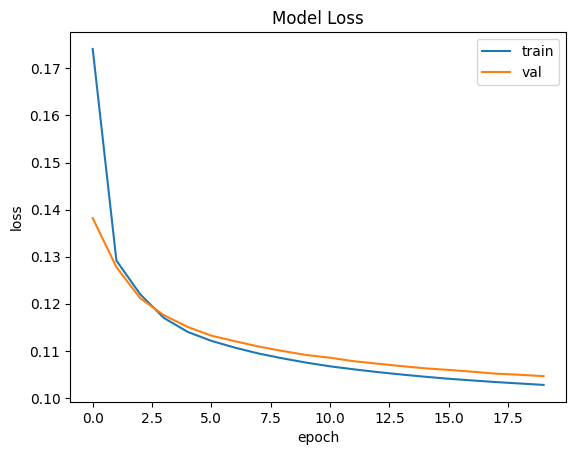

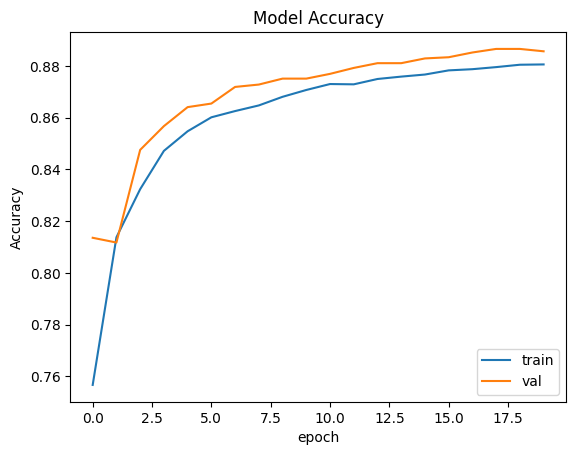

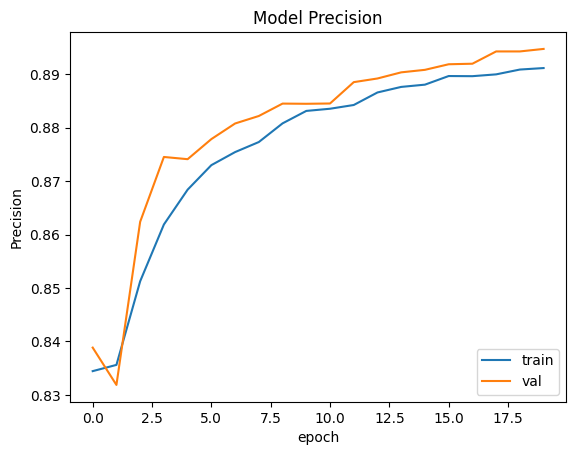

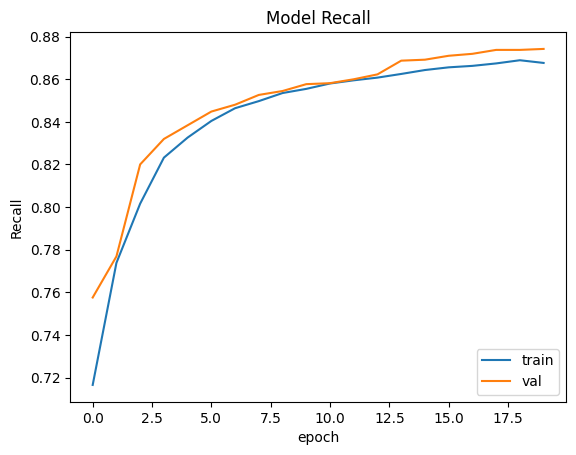

86/86 [==============================] - 0s 1ms/step


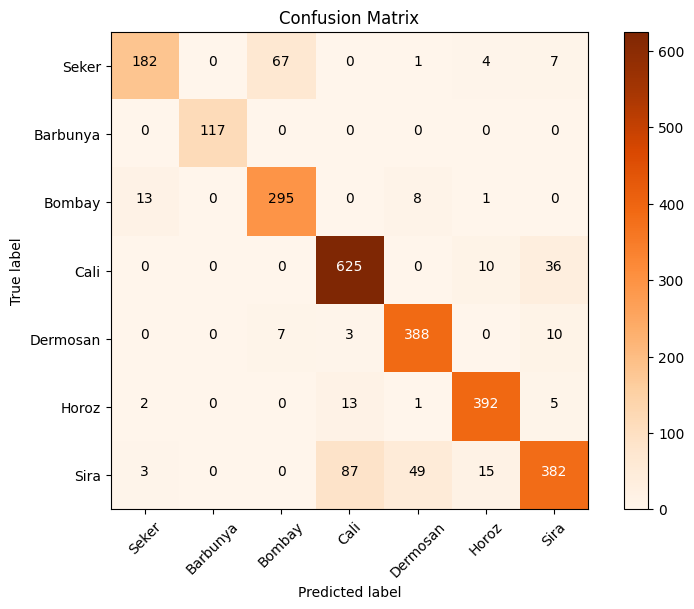

86/86 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.8744 - precision: 0.8834 - recall: 0.8623
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:

Test set Loss = 0.10307
Test set Accuracy = 0.87
Test set Precision = 0.88
Test set Recall = 0.86
Test set F1 Score = 0.87


In [107]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [108]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [109]:
#INV
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='INV',
                                                                        params={'gamma': 0.001, 'p': 0.9})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [110]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/40
269/273 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.6747 - precision: 0.8440 - recall: 0.6441
Learning Rate at the end of epoch 1: 0.08053071796894073

273/273 [==============================] - 2s 5ms/step - loss: 0.2091 - accuracy: 0.6758 - precision: 0.8439 - recall: 0.6443 - val_loss: 0.1782 - val_accuracy: 0.7241 - val_precision: 0.8191 - val_recall: 0.6217
Epoch 2/40
273/273 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.7378 - precision: 0.8221 - recall: 0.6498
Learning Rate at the end of epoch 2: 0.0676027461886406

273/273 [==============================] - 1s 4ms/step - loss: 0.1671 - accuracy: 0.7378 - precision: 0.8221 - recall: 0.6498 - val_loss: 0.1663 - val_accuracy: 0.7309 - val_precision: 0.8128 - val_recall: 0.6520
Epoch 3/40
272/273 [============================>.] - ETA: 0s - loss: 0.1591 - accuracy: 0.7474 - precision: 0.8209 - recall: 0.6665
Learning Rate at the end of epoch 3: 0.05839363485574722

27

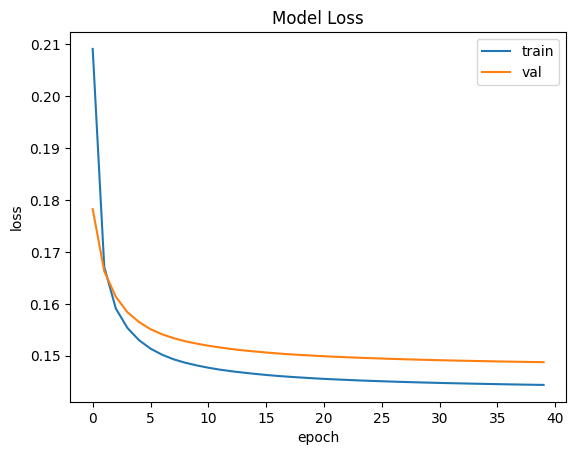

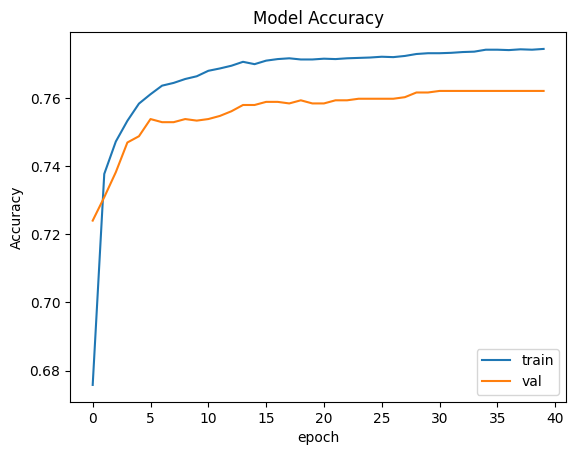

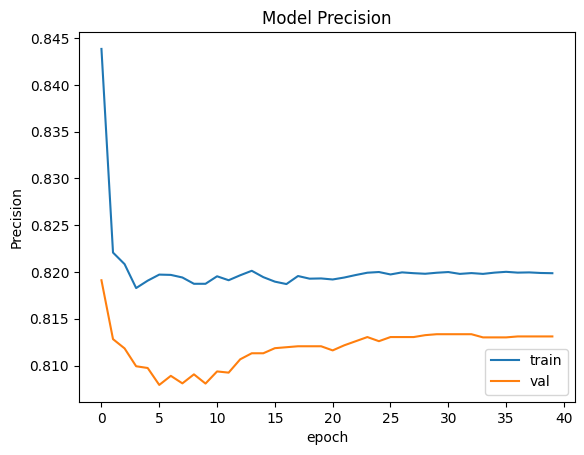

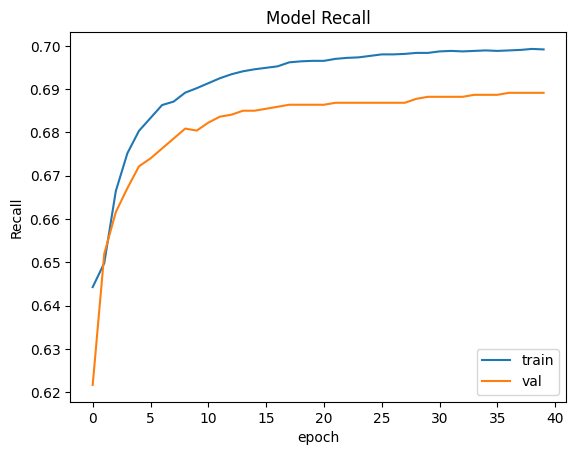

86/86 [==============================] - 0s 1ms/step


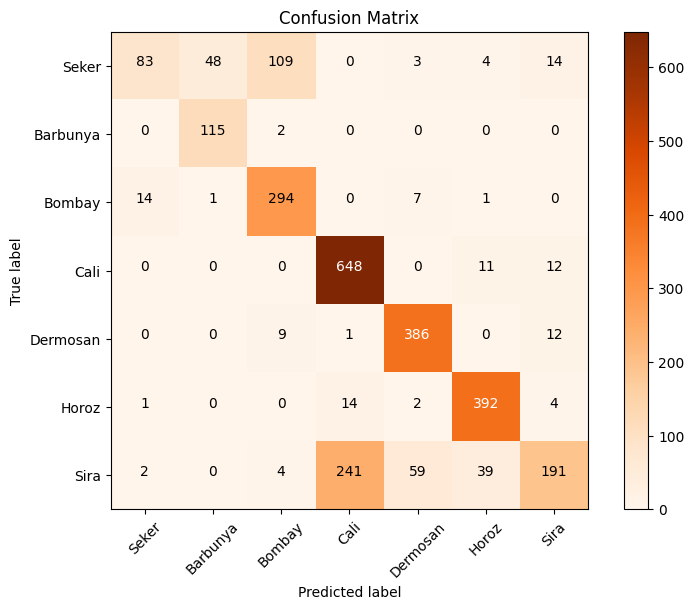

86/86 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.7745 - precision: 0.8187 - recall: 0.6915
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:

Test set Loss = 0.14564
Test set Accuracy = 0.77
Test set Precision = 0.82
Test set Recall = 0.69
Test set F1 Score = 0.75


In [111]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [121]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [122]:
#STEP
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.2, method='STEP',
                                                                        params={'gamma': 0.99, 'l': 130})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [123]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
270/273 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.7535 - precision: 0.8144 - recall: 0.6930
Learning Rate at the end of epoch 1: 0.1960200071334839

273/273 [==============================] - 2s 5ms/step - loss: 0.1576 - accuracy: 0.7535 - precision: 0.8142 - recall: 0.6931 - val_loss: 0.1339 - val_accuracy: 0.7865 - val_precision: 0.8193 - val_recall: 0.7493
Epoch 2/20
268/273 [============================>.] - ETA: 0s - loss: 0.1266 - accuracy: 0.8177 - precision: 0.8400 - recall: 0.7635
Learning Rate at the end of epoch 2: 0.19211921095848083

273/273 [==============================] - 1s 4ms/step - loss: 0.1266 - accuracy: 0.8178 - precision: 0.8404 - recall: 0.7634 - val_loss: 0.1263 - val_accuracy: 0.8329 - val_precision: 0.8519 - val_recall: 0.7741
Epoch 3/20
273/273 [==============================] - ETA: 0s - loss: 0.1216 - accuracy: 0.8370 - precision: 0.8538 - recall: 0.7886
Learning Rate at the end of epoch 3: 0.18829604983329773

27

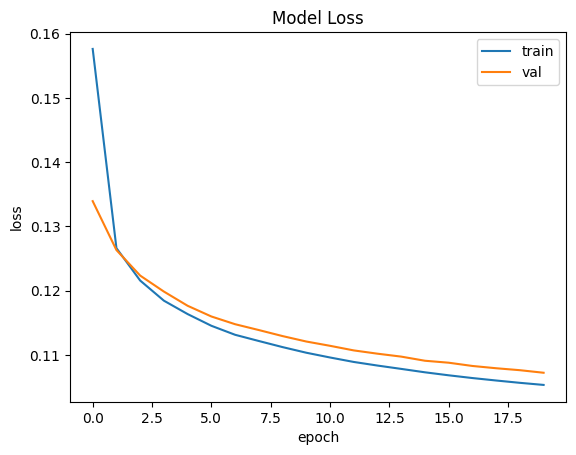

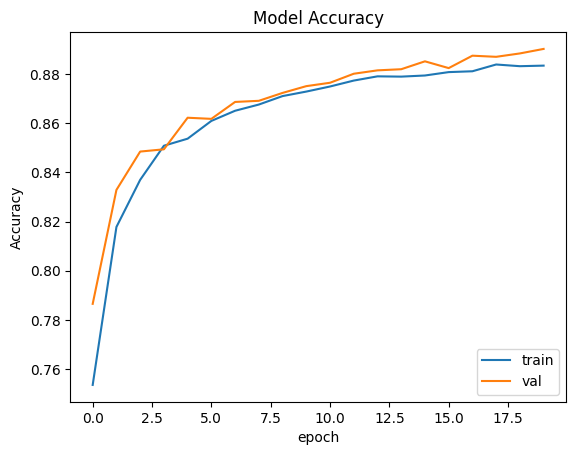

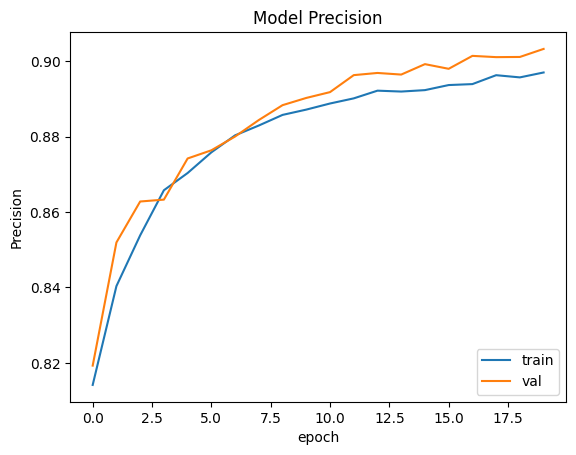

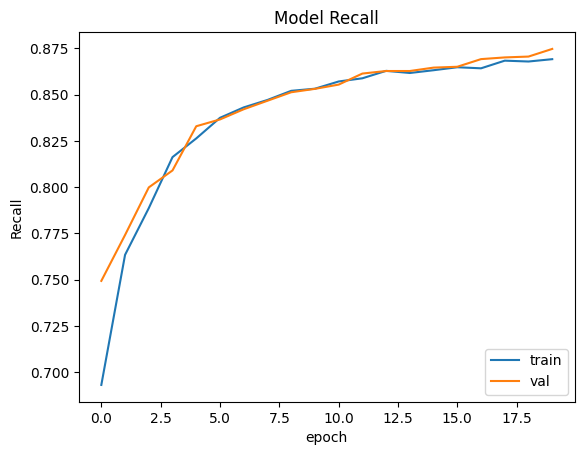

86/86 [==============================] - 0s 1ms/step


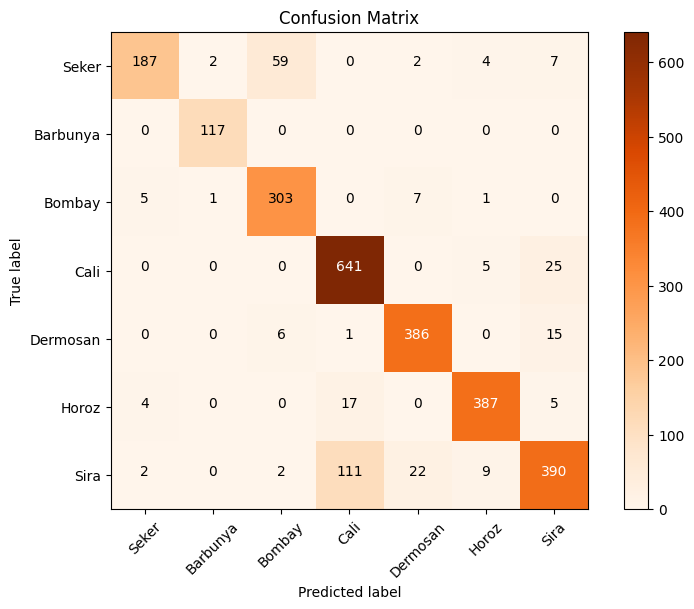

86/86 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.8854 - precision: 0.8970 - recall: 0.8704
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and STEP Learning Rate:

Test set Loss = 0.10546
Test set Accuracy = 0.89
Test set Precision = 0.90
Test set Recall = 0.87
Test set F1 Score = 0.88


In [124]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and STEP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [125]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [126]:
#POLY
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='POLY',
                                                                        params={'p': 2, 'l': train_steps ** 2})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [127]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
272/273 [============================>.] - ETA: 0s - loss: 0.1701 - accuracy: 0.7547 - precision: 0.8500 - recall: 0.7097
Learning Rate at the end of epoch 1: 0.09927140921354294

273/273 [==============================] - 3s 5ms/step - loss: 0.1700 - accuracy: 0.7549 - precision: 0.8501 - recall: 0.7099 - val_loss: 0.1372 - val_accuracy: 0.8232 - val_precision: 0.8490 - val_recall: 0.7612
Epoch 2/20
271/273 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 0.8306 - precision: 0.8578 - recall: 0.7882
Learning Rate at the end of epoch 2: 0.09854283183813095

273/273 [==============================] - 1s 4ms/step - loss: 0.1273 - accuracy: 0.8309 - precision: 0.8579 - recall: 0.7883 - val_loss: 0.1256 - val_accuracy: 0.8365 - val_precision: 0.8585 - val_recall: 0.7966
Epoch 3/20
266/273 [============================>.] - ETA: 0s - loss: 0.1195 - accuracy: 0.8399 - precision: 0.8611 - recall: 0.8082
Learning Rate at the end of epoch 3: 0.09781692922115326

2

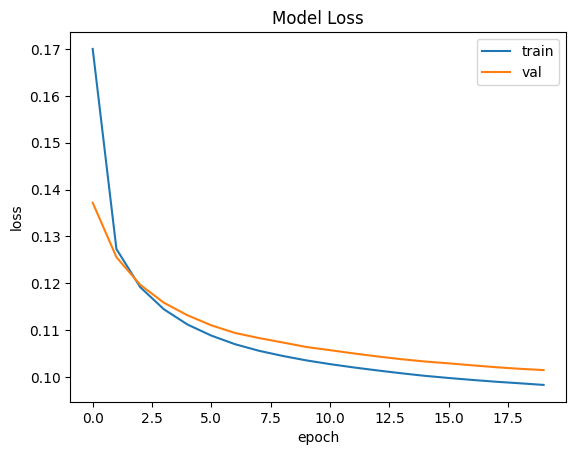

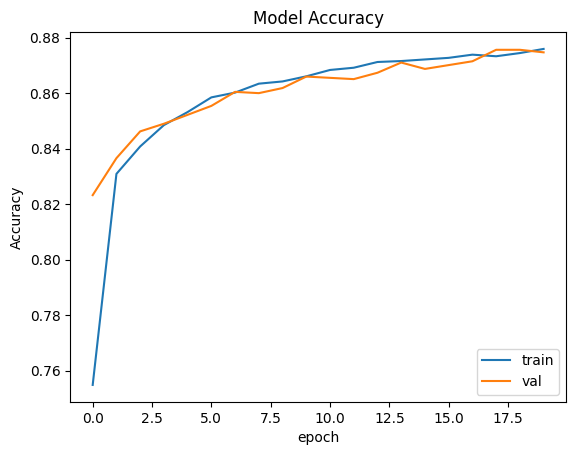

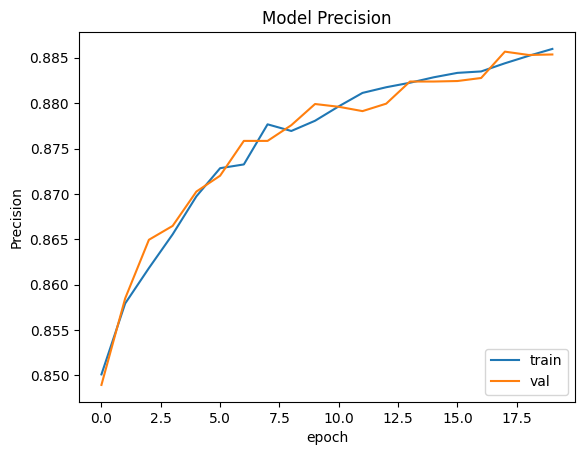

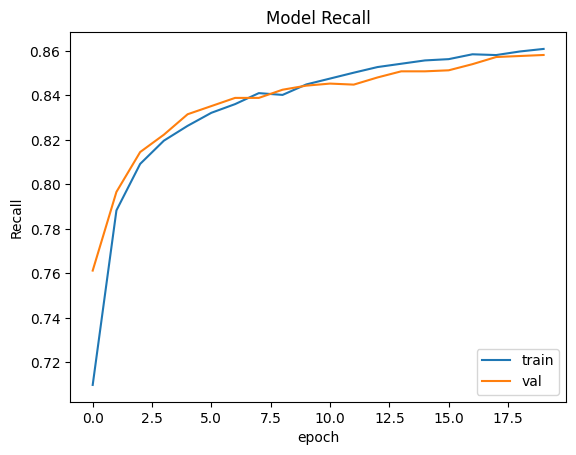

86/86 [==============================] - 0s 1ms/step


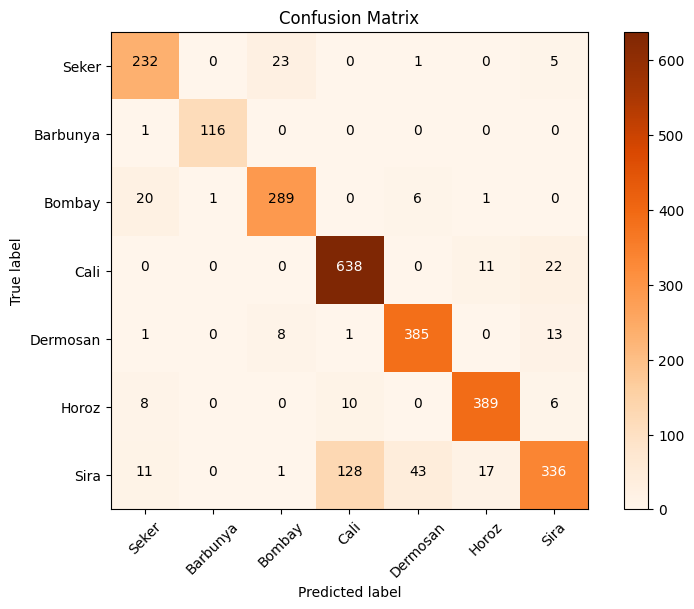

86/86 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.8759 - precision: 0.8895 - recall: 0.8601
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:

Test set Loss = 0.09972
Test set Accuracy = 0.88
Test set Precision = 0.89
Test set Recall = 0.86
Test set F1 Score = 0.87


In [128]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [143]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [144]:
#SINEXP
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='SINEXP',
                                                                        params={'k1': 0.01, 'l': 10, 'gamma': 0.9999})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [145]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/30
270/273 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.6936 - precision: 0.8866 - recall: 0.4913
Learning Rate at the end of epoch 1: 0.09329773485660553

273/273 [==============================] - 3s 7ms/step - loss: 0.2370 - accuracy: 0.6946 - precision: 0.8871 - recall: 0.4931 - val_loss: 0.1835 - val_accuracy: 0.7585 - val_precision: 0.8663 - val_recall: 0.6667
Epoch 2/30
265/273 [============================>.] - ETA: 0s - loss: 0.1650 - accuracy: 0.7802 - precision: 0.8754 - recall: 0.7059
Learning Rate at the end of epoch 2: 0.07026328146457672

273/273 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.7803 - precision: 0.8753 - recall: 0.7059 - val_loss: 0.1601 - val_accuracy: 0.7792 - val_precision: 0.8564 - val_recall: 0.7066
Epoch 3/30
264/273 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.7984 - precision: 0.8748 - recall: 0.7260
Learning Rate at the end of epoch 3: 0.03562583774328232

2

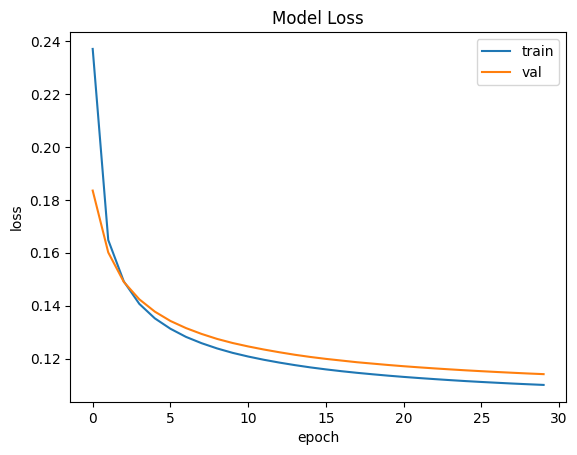

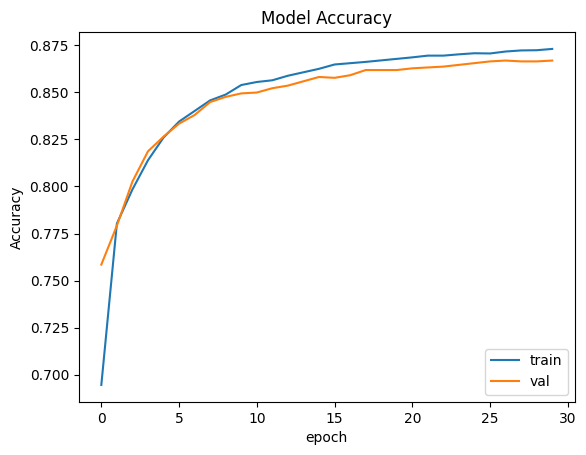

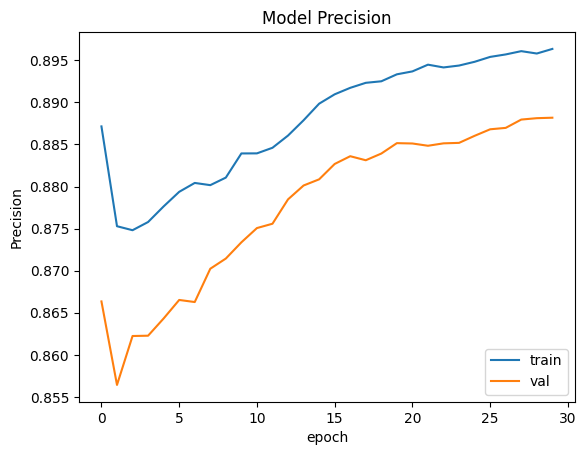

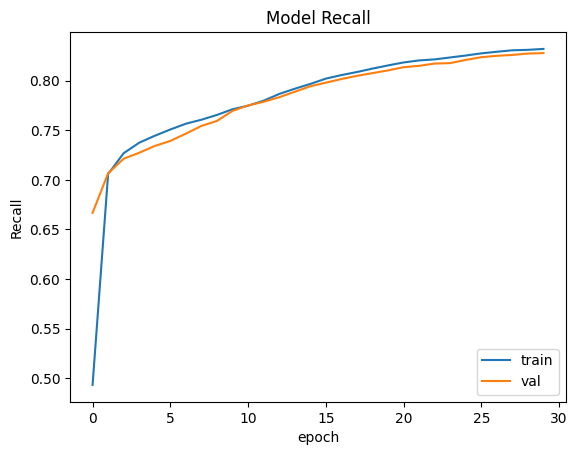

86/86 [==============================] - 0s 1ms/step


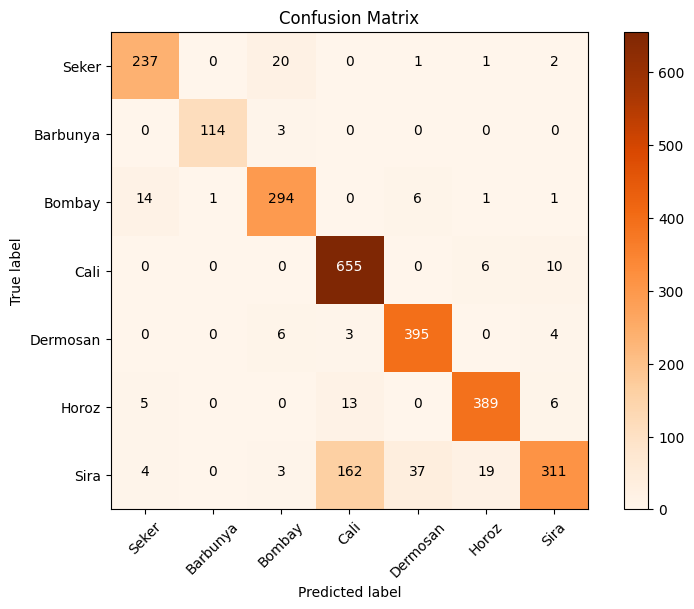

86/86 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.8795 - precision: 0.8996 - recall: 0.8329
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:

Test set Loss = 0.11096
Test set Accuracy = 0.88
Test set Precision = 0.90
Test set Recall = 0.83
Test set F1 Score = 0.86


In [146]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [171]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [172]:
#TRI
model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='TRI', params={'k1': 0.01, 'l': 10})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [173]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=50, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/50
270/273 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.5573 - precision: 0.8228 - recall: 0.5201
Learning Rate at the end of epoch 1: 0.08199987560510635

273/273 [==============================] - 2s 5ms/step - loss: 0.2942 - accuracy: 0.5583 - precision: 0.8227 - recall: 0.5201 - val_loss: 0.2417 - val_accuracy: 0.6272 - val_precision: 0.8293 - val_recall: 0.5197
Epoch 2/50
270/273 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.6803 - precision: 0.8223 - recall: 0.5286
Learning Rate at the end of epoch 2: 0.05499992519617081

273/273 [==============================] - 1s 4ms/step - loss: 0.2248 - accuracy: 0.6808 - precision: 0.8224 - recall: 0.5289 - val_loss: 0.2165 - val_accuracy: 0.6910 - val_precision: 0.8106 - val_recall: 0.5248
Epoch 3/50
269/273 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.7158 - precision: 0.8128 - recall: 0.5371
Learning Rate at the end of epoch 3: 0.027999408543109894



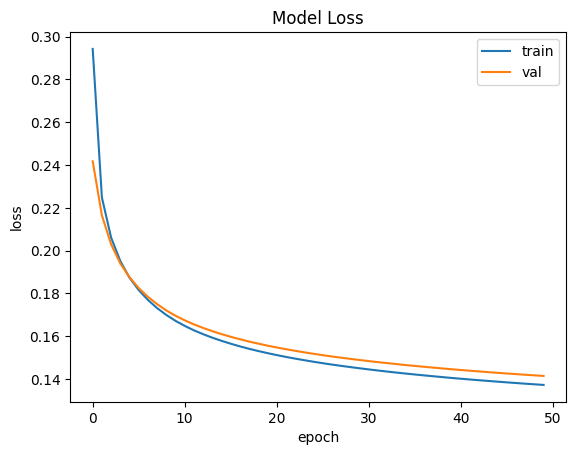

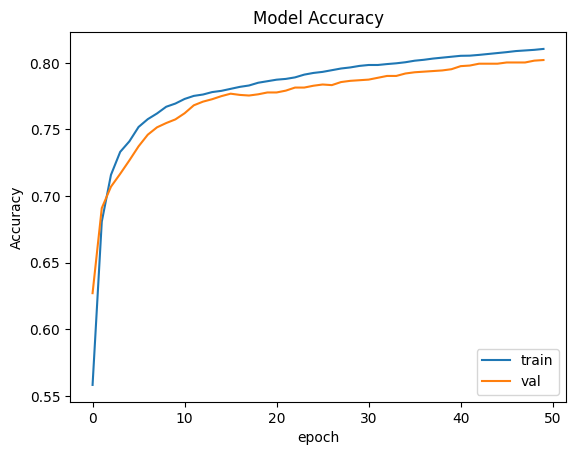

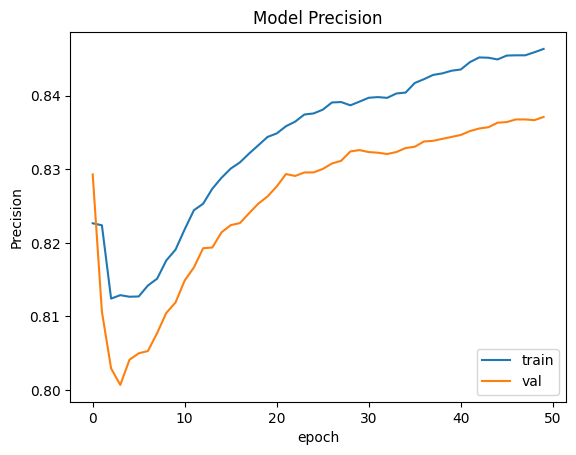

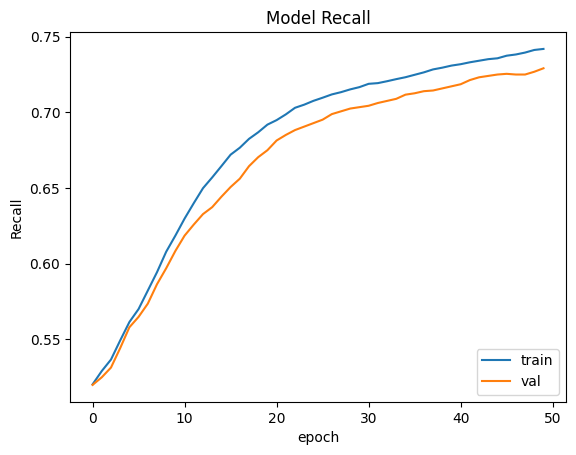

86/86 [==============================] - 0s 2ms/step


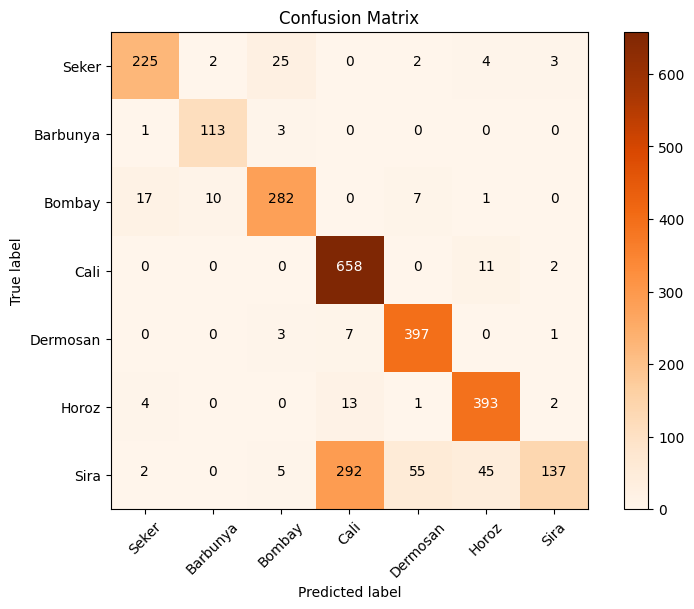

86/86 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.8098 - precision: 0.8461 - recall: 0.7367
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and TRI Learning Rate:

Test set Loss = 0.13838
Test set Accuracy = 0.81
Test set Precision = 0.85
Test set Recall = 0.74
Test set F1 Score = 0.79


In [174]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and TRI Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [193]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [194]:
#COS
model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='COS', params={'k1': 0.01, 'l': 10})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [195]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,
                          callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/40
268/273 [============================>.] - ETA: 0s - loss: 0.2518 - accuracy: 0.6693 - precision: 0.8425 - recall: 0.4824
Learning Rate at the end of epoch 1: 0.06890539824962616

273/273 [==============================] - 2s 5ms/step - loss: 0.2512 - accuracy: 0.6706 - precision: 0.8433 - recall: 0.4840 - val_loss: 0.2155 - val_accuracy: 0.7401 - val_precision: 0.8893 - val_recall: 0.5790
Epoch 2/40
260/273 [===========================>..] - ETA: 0s - loss: 0.2011 - accuracy: 0.7677 - precision: 0.8900 - recall: 0.6282
Learning Rate at the end of epoch 2: 0.009999999776482582

273/273 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.7695 - precision: 0.8901 - recall: 0.6285 - val_loss: 0.1929 - val_accuracy: 0.7750 - val_precision: 0.8863 - val_recall: 0.6189
Epoch 3/40
269/273 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.7895 - precision: 0.8806 - recall: 0.6487
Learning Rate at the end of epoch 3: 0.06890754401683807



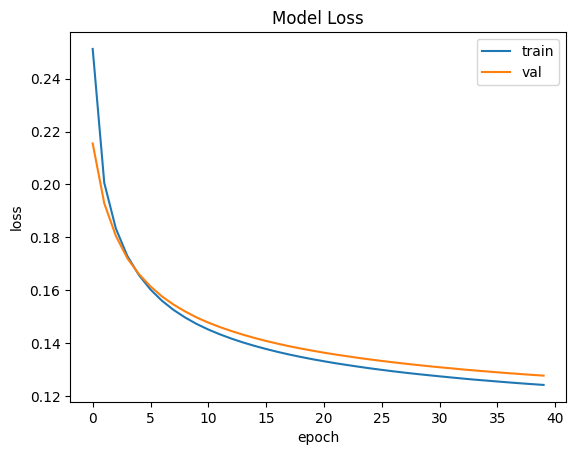

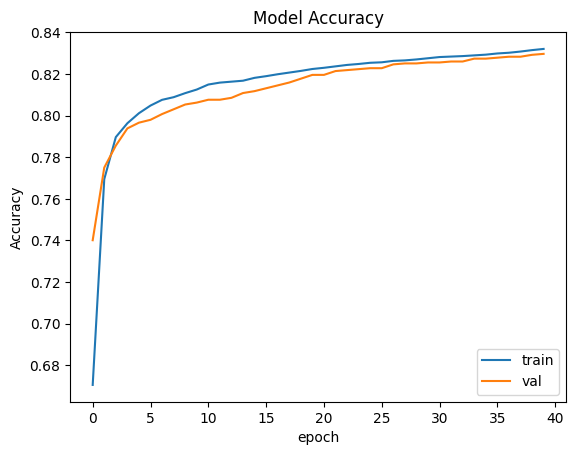

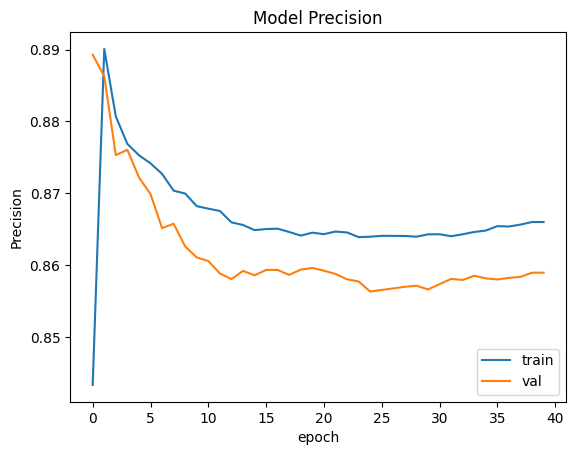

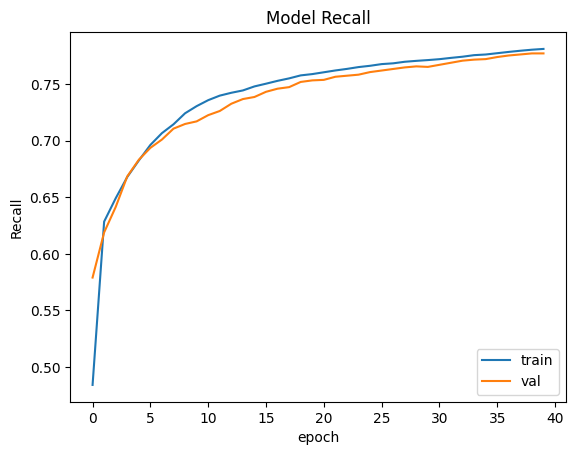

86/86 [==============================] - 0s 1ms/step


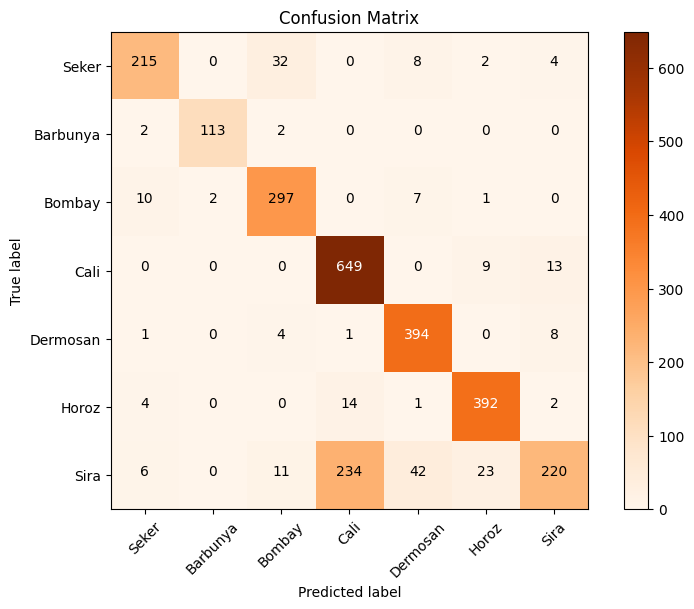

86/86 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8373 - precision: 0.8724 - recall: 0.7808
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and COS Learning Rate:

Test set Loss = 0.12437
Test set Accuracy = 0.84
Test set Precision = 0.87
Test set Recall = 0.78
Test set F1 Score = 0.82


In [196]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and COS Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [197]:
reset_model_parameters(model)

All model parameters have been reinitilized.


# DenseNet121 on CIFAR-10 Dataset with SGD and SFW

# CIFAR-10 Dataset Description

## Dataset Overview
- **Number of Instances:** 60,000 (50,000 for training, 10,000 for testing)
- **Number of Classes:** 10
- **Data Type:** Multivariate
- **Subject Area:** Computer Vision
- **Associated Tasks:** Image Classification
- **Image Dimensions:** 32x32 pixels with 3 color channels (RGB)

## Dataset Information
The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into a training set of 50,000 images and a test set of 10,000 images. Each class represents a distinct object or animal category.

## Classes
1. **Airplane**
2. **Automobile**
3. **Bird**
4. **Cat**
5. **Deer**
6. **Dog**
7. **Frog**
8. **Horse**
9. **Ship**
10. **Truck**

## Image Features
- Each image is 32x32 pixels, and it has three color channels (RGB).
- Total Features: \(32 \times 32 \times 3 = 3072\) features per image.

## Target Variable
- **Class Label:** Categorical variable indicating the class of the object or animal in the image.

## Dataset Purpose
CIFAR-10 is widely used in the field of computer vision for benchmarking image classification algorithms. The relatively small size of the images and the variety of classes make it a suitable dataset for testing and comparing the performance of different models.

## Units and Missing Values
- Pixel values in the RGB channels represent color intensity (0 to 255).
- No missing values are reported as images are complete and standardized.

## Additional Notes
- CIFAR-10 serves as a standard benchmark in machine learning research and is often used for educational purposes due to its manageable size.



In [219]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
split = 40000
X_val, y_val = X_train[split:], y_train[split:]
X_train, y_train = X_train[:split], y_train[:split]

In [220]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [221]:
batch_size = 128

train_steps = int(np.ceil(X_train.shape[0] / batch_size))
test_steps = int(np.ceil(X_test.shape[0] / batch_size))
val_steps = int(np.ceil(X_val.shape[0] / batch_size))

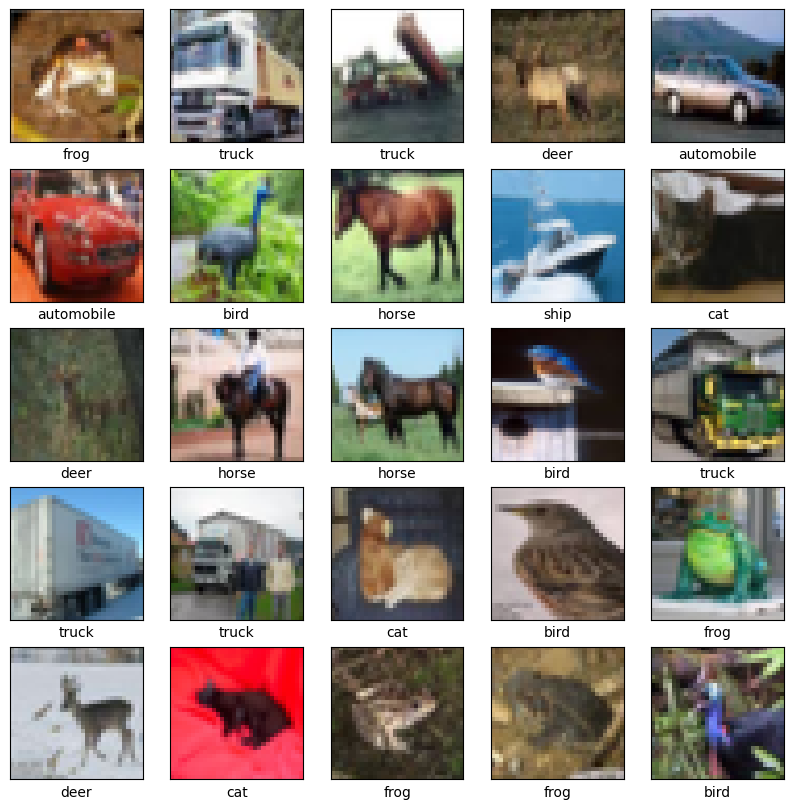

In [222]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [223]:
X_train = tf.keras.applications.densenet.preprocess_input(X_train)
X_val = tf.keras.applications.densenet.preprocess_input(X_val)
X_test = tf.keras.applications.densenet.preprocess_input(X_test)

In [224]:
y_train = one_hot_label_encoder(y_train)
y_val = one_hot_label_encoder(y_val)
y_test = one_hot_label_encoder(y_test)

In [225]:
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

# SGD as optimizer

In [226]:
densenet_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [227]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es],
                                            verbose='auto')

Epoch 1/25
313/313 [==============================] - 55s 81ms/step - loss: 2.2166 - accuracy: 0.2126 - precision: 0.6767 - recall: 0.1521 - val_loss: 2.0976 - val_accuracy: 0.2420 - val_precision: 0.6389 - val_recall: 0.0023
Epoch 2/25
313/313 [==============================] - 23s 73ms/step - loss: 1.9044 - accuracy: 0.3088 - precision: 0.5153 - recall: 0.0627 - val_loss: 1.8618 - val_accuracy: 0.3231 - val_precision: 0.5388 - val_recall: 0.0716
Epoch 3/25
313/313 [==============================] - 23s 73ms/step - loss: 1.7660 - accuracy: 0.3580 - precision: 0.5738 - recall: 0.1021 - val_loss: 1.7540 - val_accuracy: 0.3623 - val_precision: 0.5598 - val_recall: 0.1077
Epoch 4/25
313/313 [==============================] - 23s 74ms/step - loss: 1.6733 - accuracy: 0.3892 - precision: 0.6136 - recall: 0.1394 - val_loss: 1.6801 - val_accuracy: 0.3864 - val_precision: 0.5984 - val_recall: 0.1475
Epoch 5/25
313/313 [==============================] - 23s 74ms/step - loss: 1.6006 - accuracy: 0

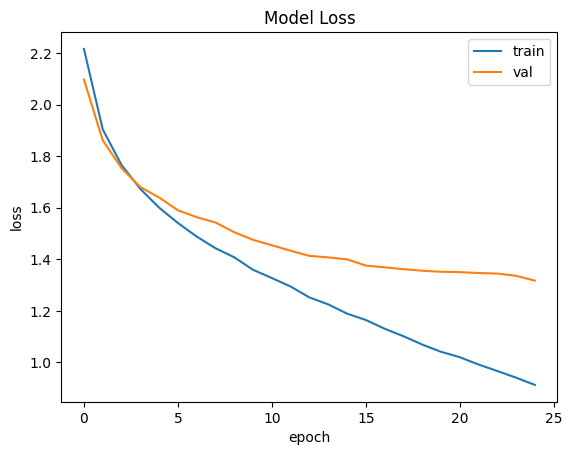

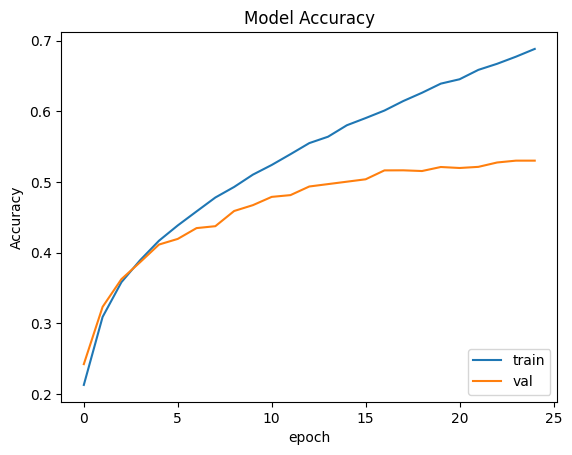

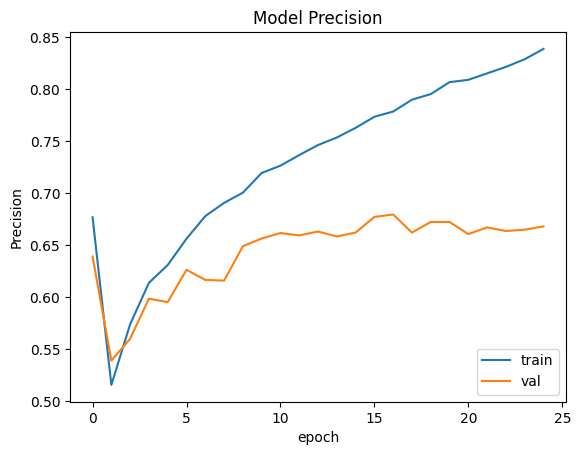

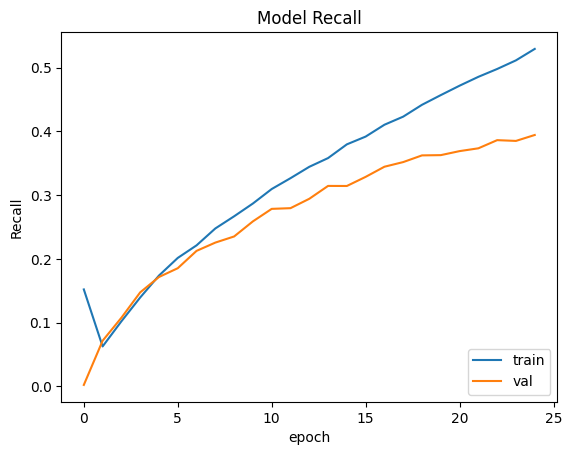

79/79 [==============================] - 3s 15ms/step


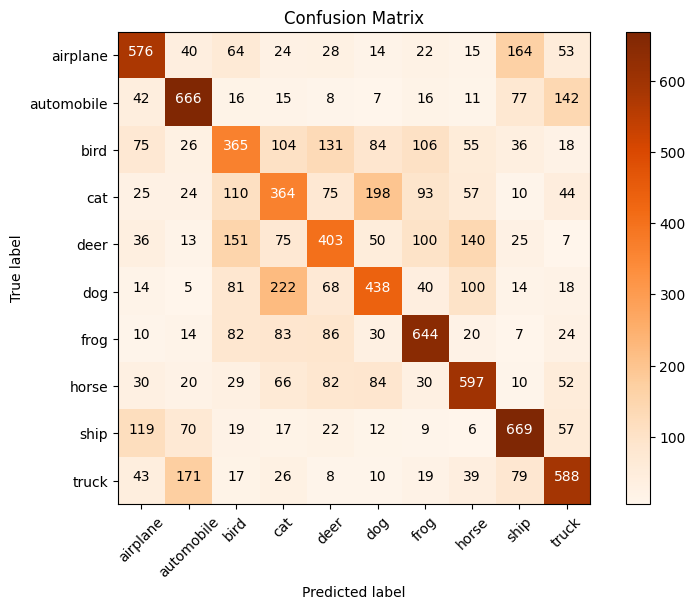

79/79 [==============================] - 1s 18ms/step - loss: 1.3221 - accuracy: 0.5310 - precision: 0.6614 - recall: 0.3962
DenseNet model classifier evaluation results with SGD optimizer:

Test set Loss = 1.32208
Test set Accuracy = 0.53
Test set Precision = 0.66
Test set Recall = 0.40
Test set F1 Score = 0.50


In [228]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with SGD optimizer:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

# SFW as optimizer

In [229]:
#FIX
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [230]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='FIX', params={})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [231]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 1.9414 - accuracy: 0.3613 - precision: 0.6053 - recall: 0.1856
Learning Rate at the end of epoch 1: 0.10000000149011612

313/313 [==============================] - 78s 87ms/step - loss: 1.9414 - accuracy: 0.3613 - precision: 0.6053 - recall: 0.1856 - val_loss: 1.7505 - val_accuracy: 0.3448 - val_precision: 0.7595 - val_recall: 0.0240
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.4000 - accuracy: 0.4836 - precision: 0.6872 - recall: 0.2718
Learning Rate at the end of epoch 2: 0.10000000149011612

313/313 [==============================] - 25s 79ms/step - loss: 1.4000 - accuracy: 0.4836 - precision: 0.6872 - recall: 0.2718 - val_loss: 1.4395 - val_accuracy: 0.4812 - val_precision: 0.7402 - val_recall: 0.1878
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.3034 - accuracy: 0.5239 - precision: 0.7082 - recall: 0.3257
Learning Rate at the end of epoch 3: 0.1000000014901161

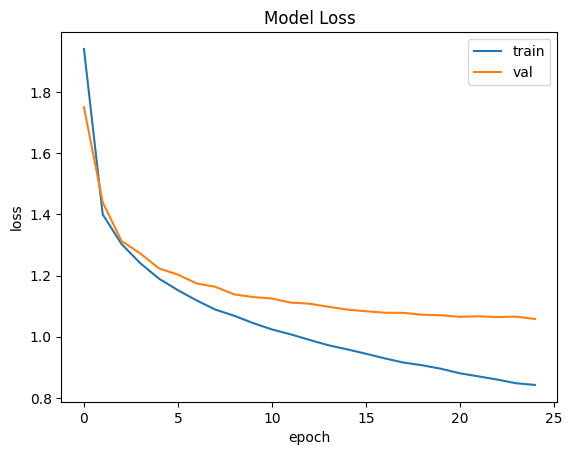

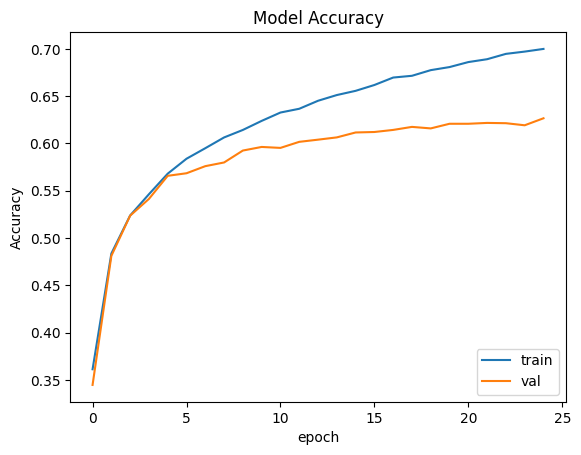

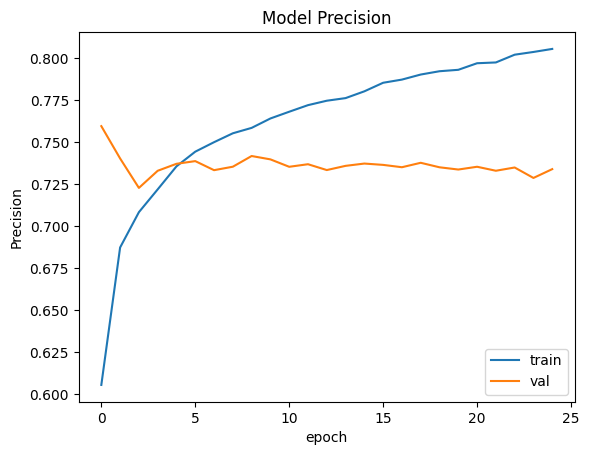

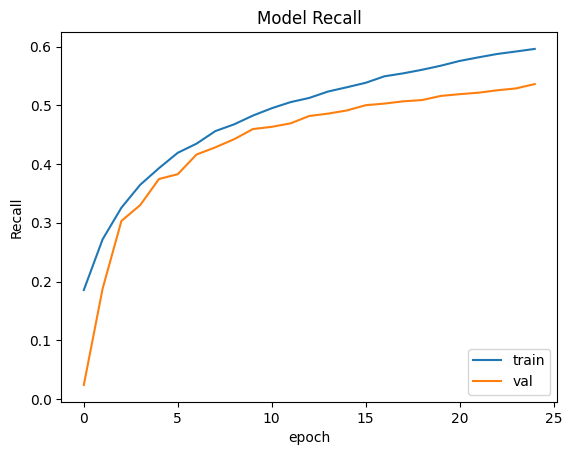

79/79 [==============================] - 1s 15ms/step


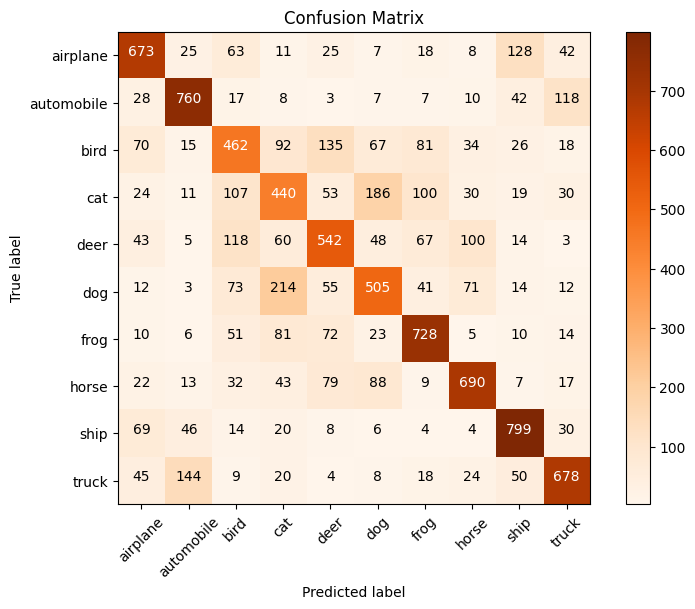

79/79 [==============================] - 1s 18ms/step - loss: 1.0632 - accuracy: 0.6277 - precision: 0.7272 - recall: 0.5339
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:

Test set Loss = 1.06319
Test set Accuracy = 0.63
Test set Precision = 0.73
Test set Recall = 0.53
Test set F1 Score = 0.62


In [233]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [234]:
#EXP
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [235]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='EXP', params={'gamma': 0.9999})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [236]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 2.1225 - accuracy: 0.2942 - precision: 0.6429 - recall: 0.1542
Learning Rate at the end of epoch 1: 0.09692751616239548

313/313 [==============================] - 74s 85ms/step - loss: 2.1225 - accuracy: 0.2942 - precision: 0.6429 - recall: 0.1542 - val_loss: 1.9120 - val_accuracy: 0.3040 - val_precision: 0.8636 - val_recall: 0.0019
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.5762 - accuracy: 0.4082 - precision: 0.6300 - recall: 0.1698
Learning Rate at the end of epoch 2: 0.09394004195928574

313/313 [==============================] - 24s 78ms/step - loss: 1.5762 - accuracy: 0.4082 - precision: 0.6300 - recall: 0.1698 - val_loss: 1.6275 - val_accuracy: 0.3960 - val_precision: 0.7183 - val_recall: 0.0775
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.4863 - accuracy: 0.4451 - precision: 0.6614 - recall: 0.2201
Learning Rate at the end of epoch 3: 0.0910446420311927

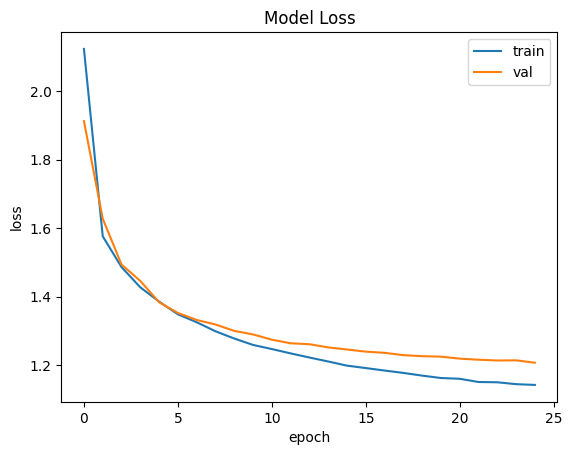

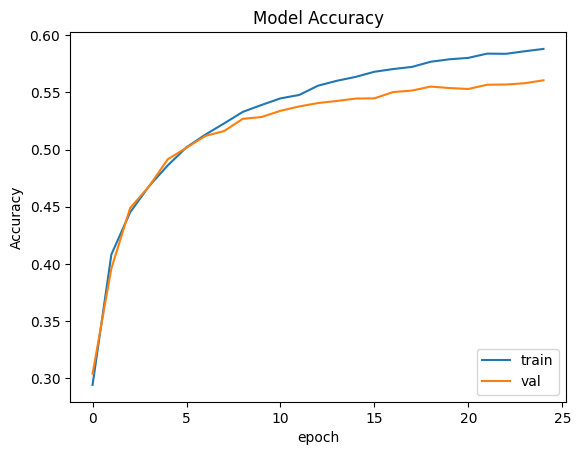

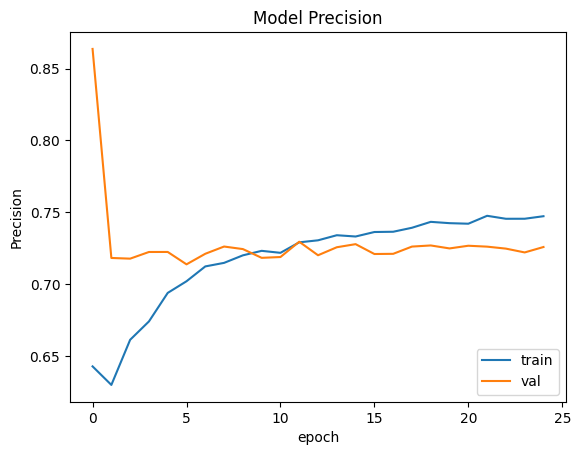

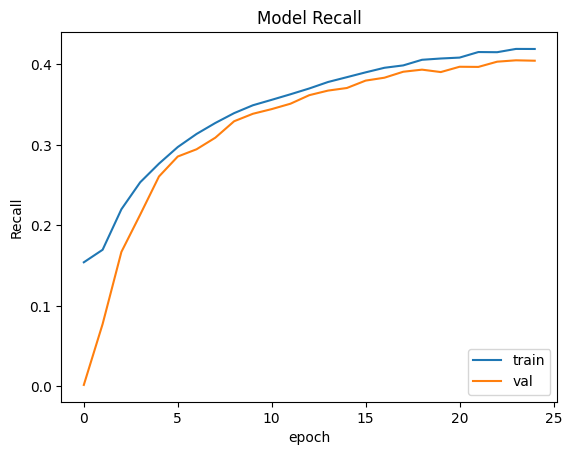

79/79 [==============================] - 3s 15ms/step


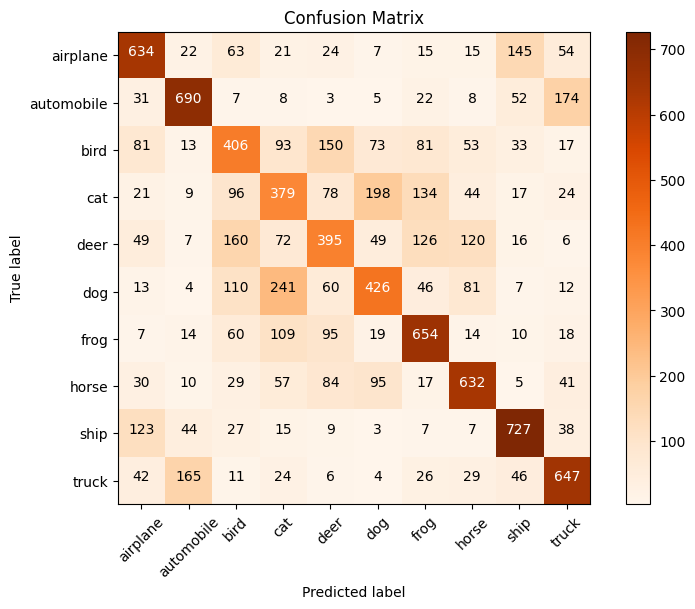

79/79 [==============================] - 1s 18ms/step - loss: 1.2214 - accuracy: 0.5590 - precision: 0.7137 - recall: 0.4009
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:

Test set Loss = 1.22139
Test set Accuracy = 0.56
Test set Precision = 0.71
Test set Recall = 0.40
Test set F1 Score = 0.51


In [237]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [241]:
#INV
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [242]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.2, method='INV',
                                                                        params={'gamma': 0.0001, 'p': 0.9})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [243]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/40
313/313 [==============================] - ETA: 0s - loss: 1.9656 - accuracy: 0.3677 - precision: 0.5930 - recall: 0.0747
Learning Rate at the end of epoch 1: 0.19454558193683624

313/313 [==============================] - 75s 86ms/step - loss: 1.9656 - accuracy: 0.3677 - precision: 0.5930 - recall: 0.0747 - val_loss: 2.2713 - val_accuracy: 0.1447 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
313/313 [==============================] - ETA: 0s - loss: 1.3759 - accuracy: 0.4952 - precision: 0.6870 - recall: 0.2817
Learning Rate at the end of epoch 2: 0.18937994539737701

313/313 [==============================] - 24s 78ms/step - loss: 1.3759 - accuracy: 0.4952 - precision: 0.6870 - recall: 0.2817 - val_loss: 1.9841 - val_accuracy: 0.2754 - val_precision: 0.5116 - val_recall: 0.0884
Epoch 3/40
313/313 [==============================] - ETA: 0s - loss: 1.2586 - accuracy: 0.5428 - precision: 0.7202 - recall: 0.3569
Learning Rate at the end of epoch 3: 0.18449555

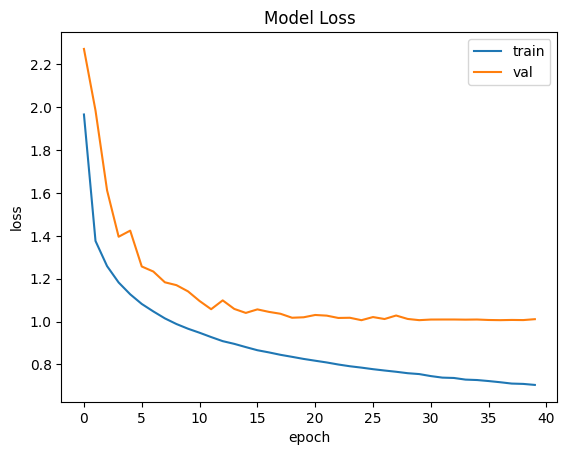

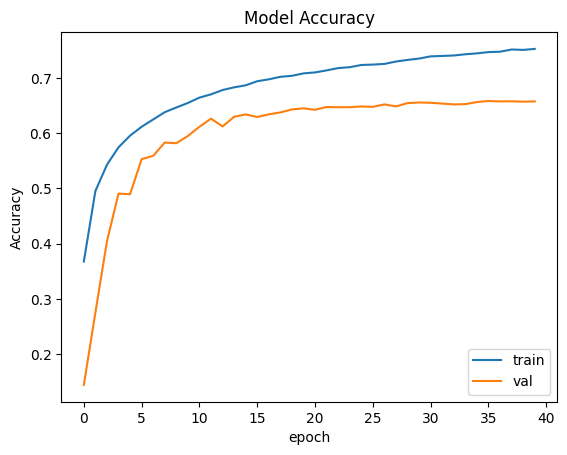

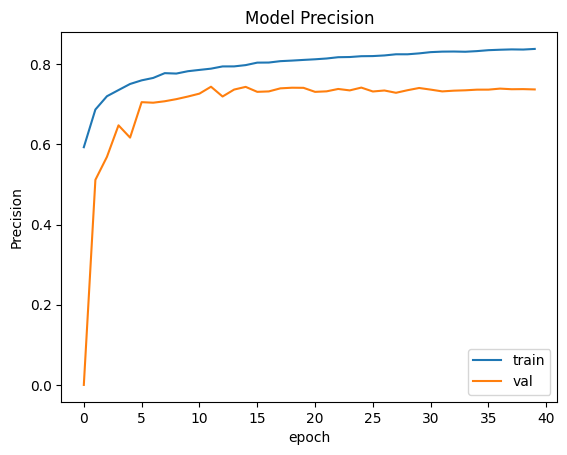

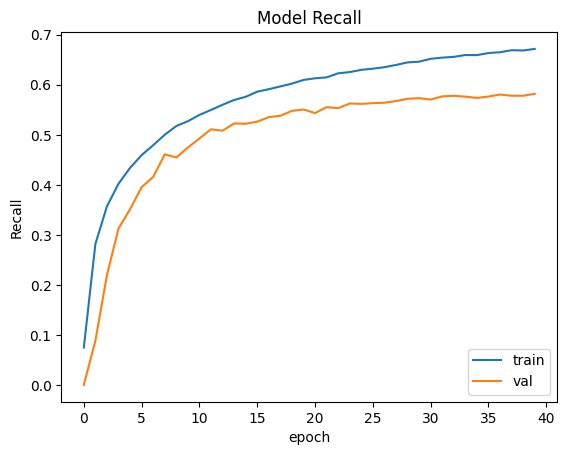

79/79 [==============================] - 3s 15ms/step


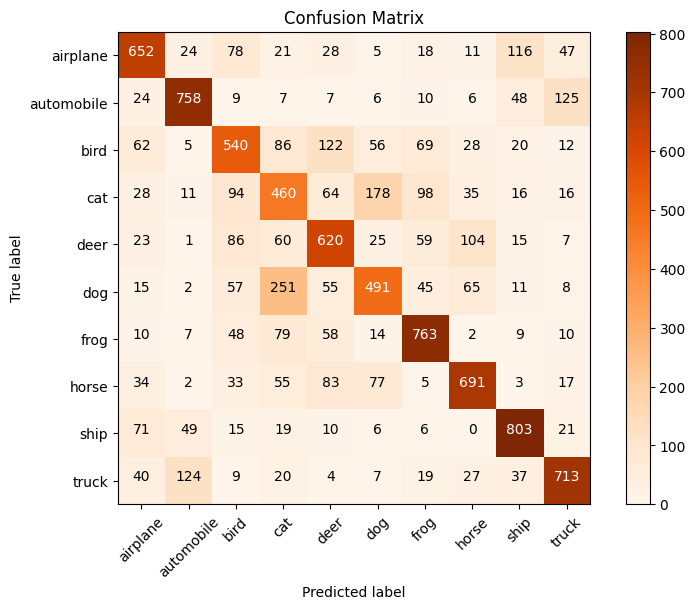

79/79 [==============================] - 2s 19ms/step - loss: 1.0213 - accuracy: 0.6491 - precision: 0.7316 - recall: 0.5765
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:

Test set Loss = 1.02133
Test set Accuracy = 0.65
Test set Precision = 0.73
Test set Recall = 0.58
Test set F1 Score = 0.64


In [244]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [245]:
#POLY
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [246]:
Num_Epochs = 25

densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.25, method='POLY',
                                                                        params={'p': 0.9,
                                                                                'l': train_steps * Num_Epochs})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [247]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=Num_Epochs, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 2.0656 - accuracy: 0.3314 - precision: 0.6693 - recall: 0.1901
Learning Rate at the end of epoch 1: 0.24101059138774872

313/313 [==============================] - 73s 85ms/step - loss: 2.0656 - accuracy: 0.3314 - precision: 0.6693 - recall: 0.1901 - val_loss: 2.2168 - val_accuracy: 0.1357 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.4517 - accuracy: 0.4600 - precision: 0.6794 - recall: 0.2377
Learning Rate at the end of epoch 2: 0.23195479810237885

313/313 [==============================] - 24s 77ms/step - loss: 1.4517 - accuracy: 0.4600 - precision: 0.6794 - recall: 0.2377 - val_loss: 1.8297 - val_accuracy: 0.3026 - val_precision: 0.5650 - val_recall: 0.0391
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.3148 - accuracy: 0.5135 - precision: 0.7075 - recall: 0.3164
Learning Rate at the end of epoch 3: 0.22285950

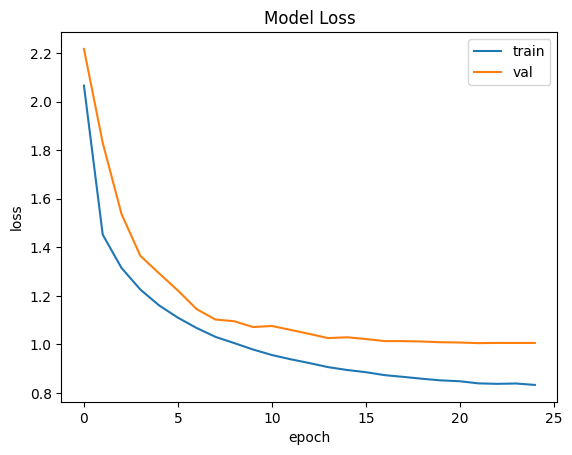

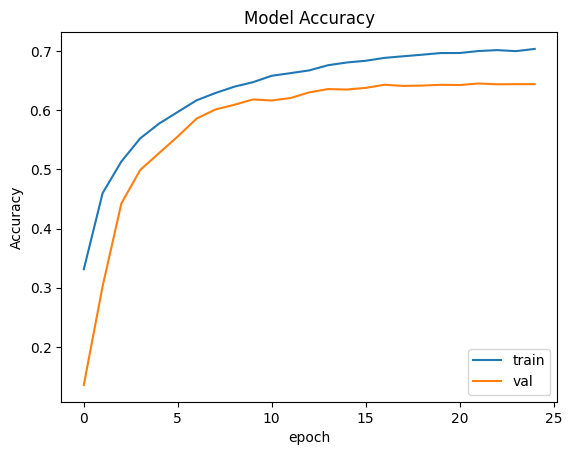

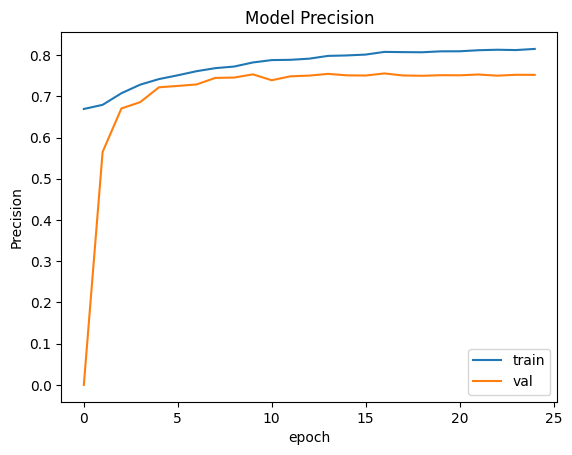

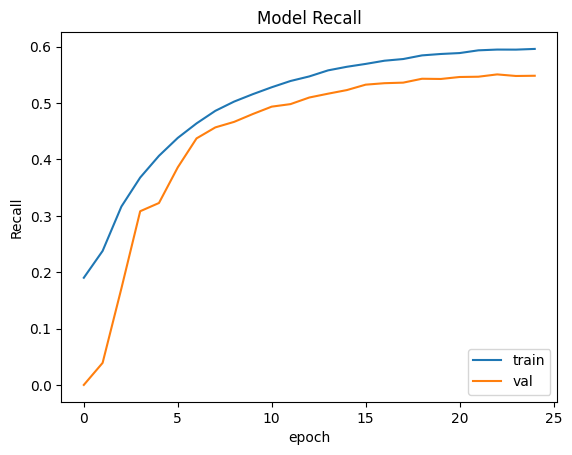

79/79 [==============================] - 3s 15ms/step


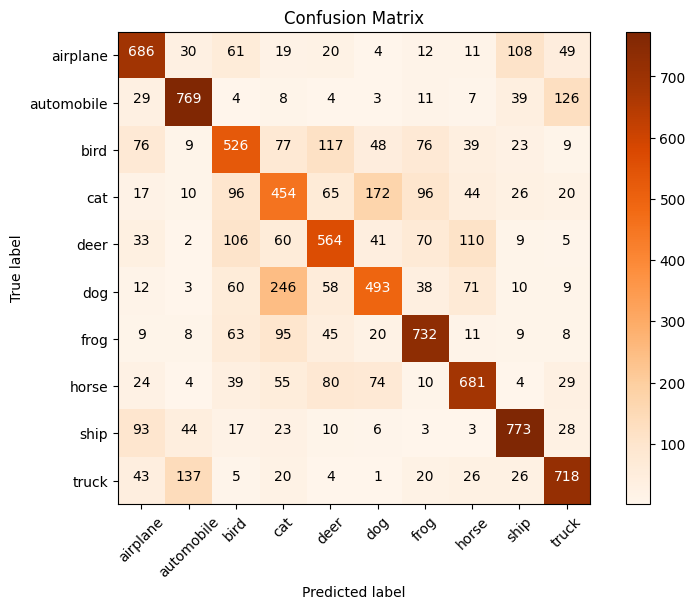

79/79 [==============================] - 1s 18ms/step - loss: 1.0235 - accuracy: 0.6396 - precision: 0.7452 - recall: 0.5379
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:

Test set Loss = 1.02347
Test set Accuracy = 0.64
Test set Precision = 0.75
Test set Recall = 0.54
Test set F1 Score = 0.62


In [248]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [249]:
#TRI
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [250]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='TRI', params={'l': 100, 'k1': 0.01})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [251]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 1.7485 - accuracy: 0.3828 - precision: 0.6475 - recall: 0.2331
Learning Rate at the end of epoch 1: 0.08919999748468399

313/313 [==============================] - 73s 87ms/step - loss: 1.7485 - accuracy: 0.3828 - precision: 0.6475 - recall: 0.2331 - val_loss: 1.5142 - val_accuracy: 0.4318 - val_precision: 0.6929 - val_recall: 0.1584
Epoch 2/20
313/313 [==============================] - ETA: 0s - loss: 1.3260 - accuracy: 0.5153 - precision: 0.6848 - recall: 0.3260
Learning Rate at the end of epoch 2: 0.0325000137090683

313/313 [==============================] - 25s 79ms/step - loss: 1.3260 - accuracy: 0.5153 - precision: 0.6848 - recall: 0.3260 - val_loss: 1.3052 - val_accuracy: 0.5192 - val_precision: 0.7276 - val_recall: 0.2959
Epoch 3/20
313/313 [==============================] - ETA: 0s - loss: 1.1872 - accuracy: 0.5714 - precision: 0.7222 - recall: 0.4097
Learning Rate at the end of epoch 3: 0.06579992920160294

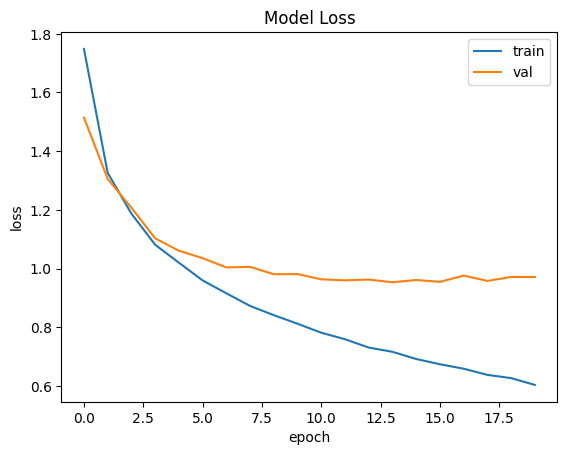

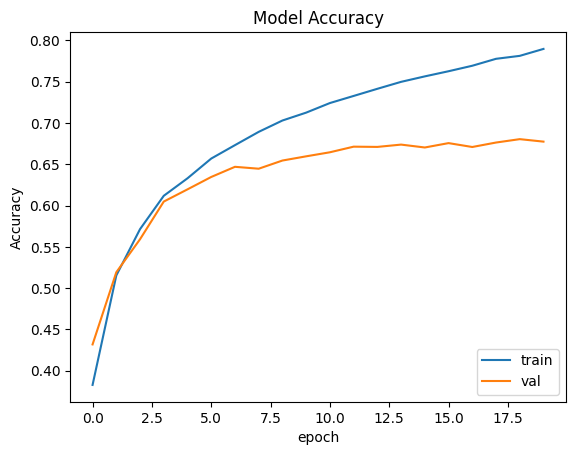

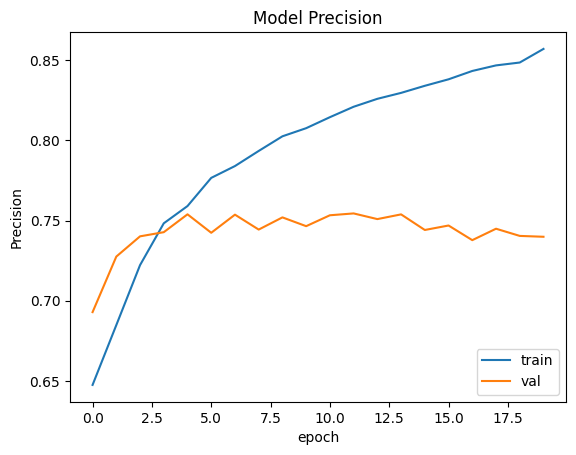

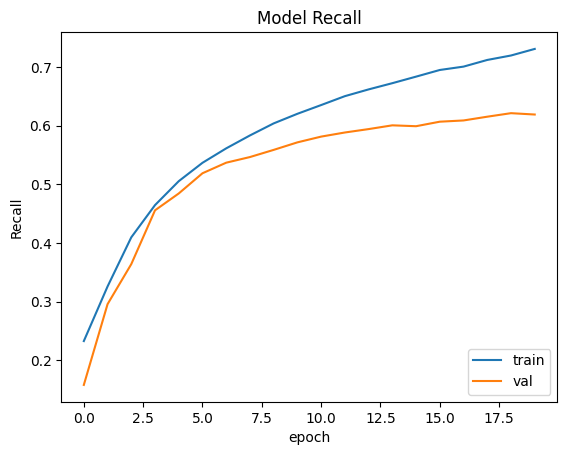

79/79 [==============================] - 3s 15ms/step


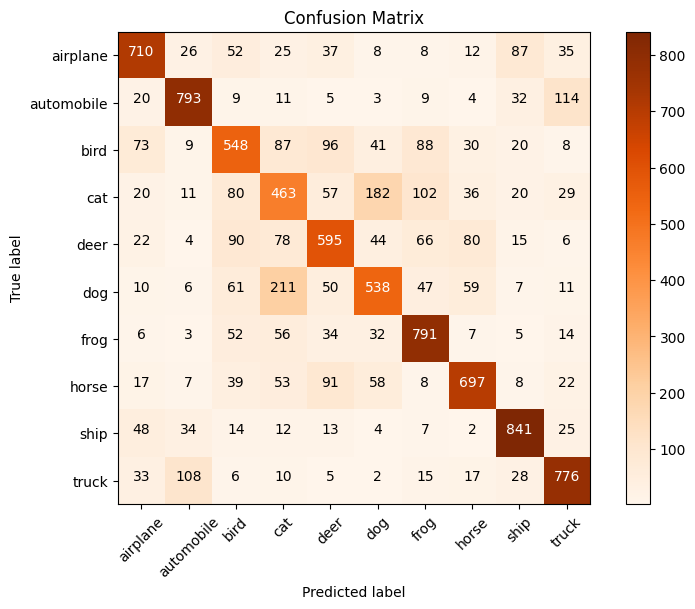

79/79 [==============================] - 1s 18ms/step - loss: 0.9893 - accuracy: 0.6752 - precision: 0.7363 - recall: 0.6221
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and TRI Learning Rate:

Test set Loss = 0.98931
Test set Accuracy = 0.68
Test set Precision = 0.74
Test set Recall = 0.62
Test set F1 Score = 0.67


In [252]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and TRI Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [253]:
#SINEXP
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [254]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='SINEXP',
                                                                        params={'l': train_steps * 3, 'k1': 0.01,
                                                                                'gamma': 0.999})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [255]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 1.6871 - accuracy: 0.3998 - precision: 0.6674 - recall: 0.2619
Learning Rate at the end of epoch 1: 0.0428386926651001

313/313 [==============================] - 73s 85ms/step - loss: 1.6871 - accuracy: 0.3998 - precision: 0.6674 - recall: 0.2619 - val_loss: 1.5612 - val_accuracy: 0.4504 - val_precision: 0.7500 - val_recall: 0.1245
Epoch 2/20
313/313 [==============================] - ETA: 0s - loss: 1.2663 - accuracy: 0.5441 - precision: 0.7013 - recall: 0.3748
Learning Rate at the end of epoch 2: 0.05166645348072052

313/313 [==============================] - 24s 77ms/step - loss: 1.2663 - accuracy: 0.5441 - precision: 0.7013 - recall: 0.3748 - val_loss: 1.2277 - val_accuracy: 0.5556 - val_precision: 0.7569 - val_recall: 0.3453
Epoch 3/20
313/313 [==============================] - ETA: 0s - loss: 1.0557 - accuracy: 0.6202 - precision: 0.7496 - recall: 0.4901
Learning Rate at the end of epoch 3: 0.04521073400974274

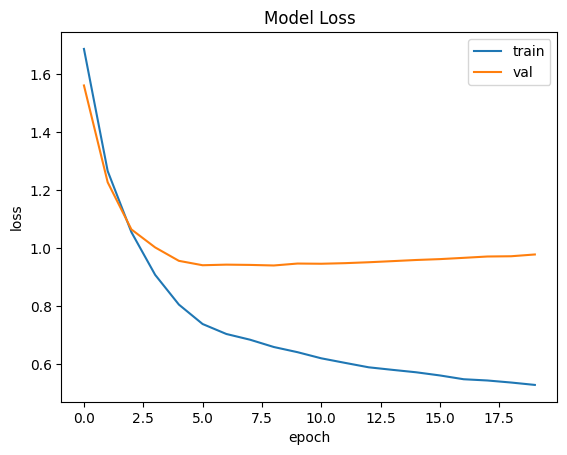

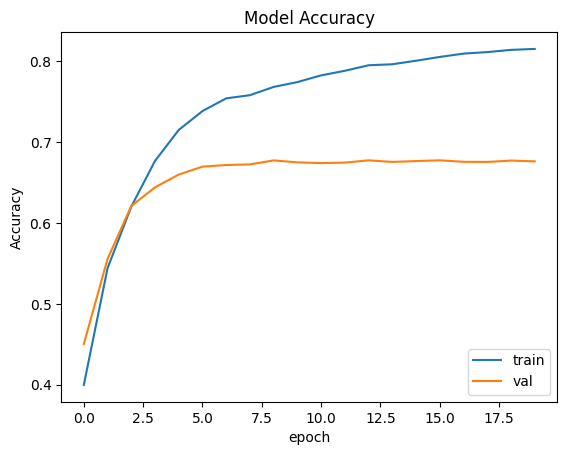

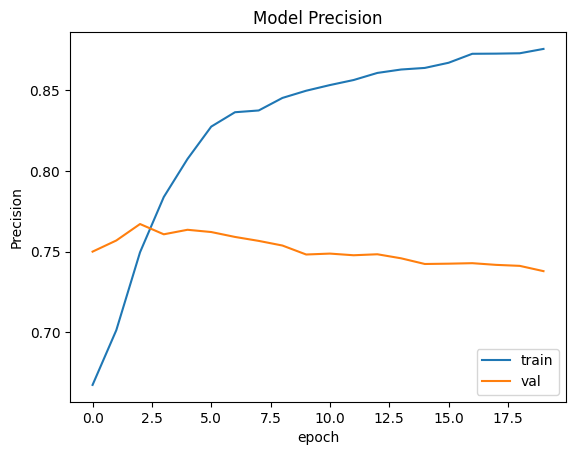

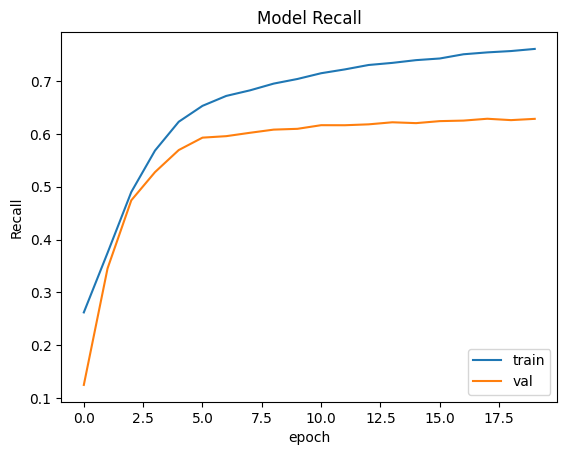

79/79 [==============================] - 3s 16ms/step


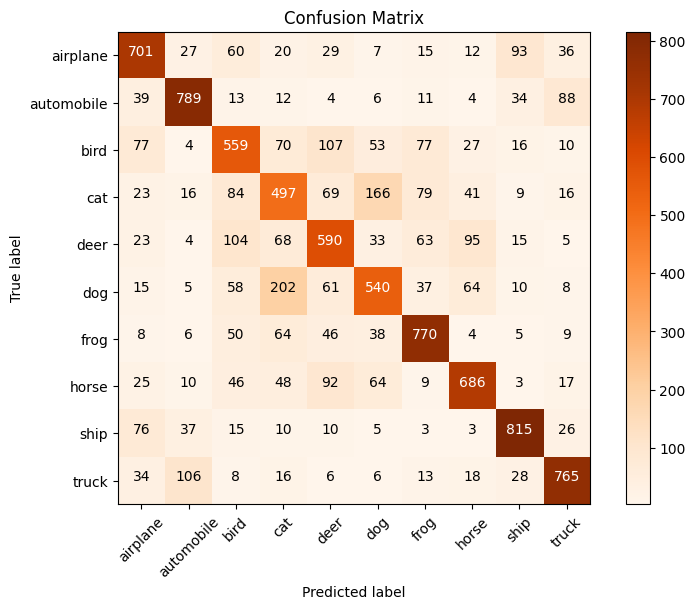

79/79 [==============================] - 1s 18ms/step - loss: 1.0027 - accuracy: 0.6712 - precision: 0.7322 - recall: 0.6220
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:

Test set Loss = 1.00266
Test set Accuracy = 0.67
Test set Precision = 0.73
Test set Recall = 0.62
Test set F1 Score = 0.67


In [256]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [257]:
#COS
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None,
                                                            input_shape=X_train.shape[1:],
                                                            pooling='avg', classes=len(class_names),
                                                            classifier_activation='softmax')

In [258]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(
        learning_rate=MyLearningRateSchedule(initial_learning_rate=0.2, method='COS', params={'l': 10, 'k1': 0.02})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [259]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                                            validation_data=(X_val, y_val),
                                            steps_per_epoch=train_steps, validation_steps=val_steps,
                                            callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 2.2361 - accuracy: 0.3230 - precision: 0.6473 - recall: 0.1943
Learning Rate at the end of epoch 1: 0.13781122863292694

313/313 [==============================] - 76s 86ms/step - loss: 2.2361 - accuracy: 0.3230 - precision: 0.6473 - recall: 0.1943 - val_loss: 1.9142 - val_accuracy: 0.2938 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
313/313 [==============================] - ETA: 0s - loss: 1.4533 - accuracy: 0.4579 - precision: 0.6633 - recall: 0.2387
Learning Rate at the end of epoch 2: 0.019999999552965164

313/313 [==============================] - 24s 78ms/step - loss: 1.4533 - accuracy: 0.4579 - precision: 0.6633 - recall: 0.2387 - val_loss: 1.5516 - val_accuracy: 0.4524 - val_precision: 0.7351 - val_recall: 0.0866
Epoch 3/20
313/313 [==============================] - ETA: 0s - loss: 1.3305 - accuracy: 0.5105 - precision: 0.7002 - recall: 0.3108
Learning Rate at the end of epoch 3: 0.1378124

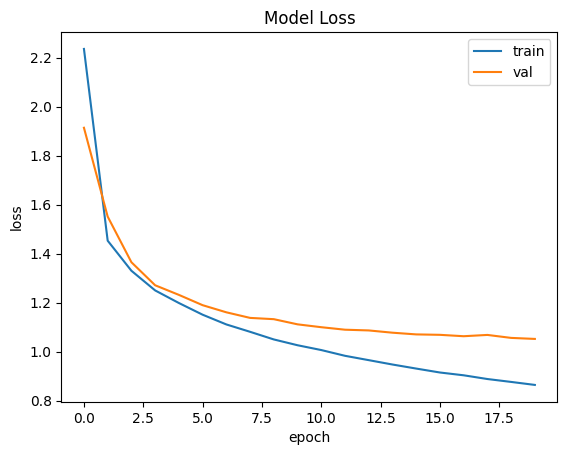

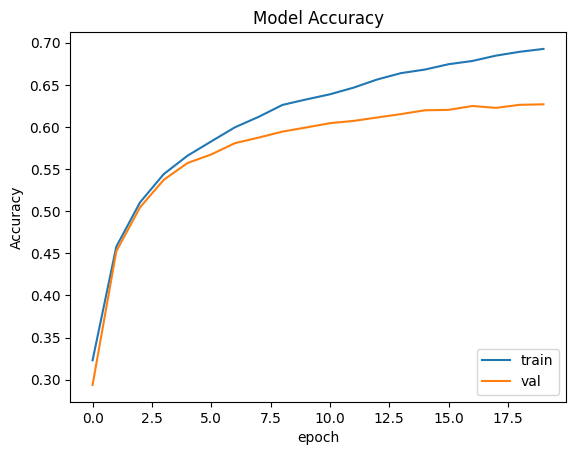

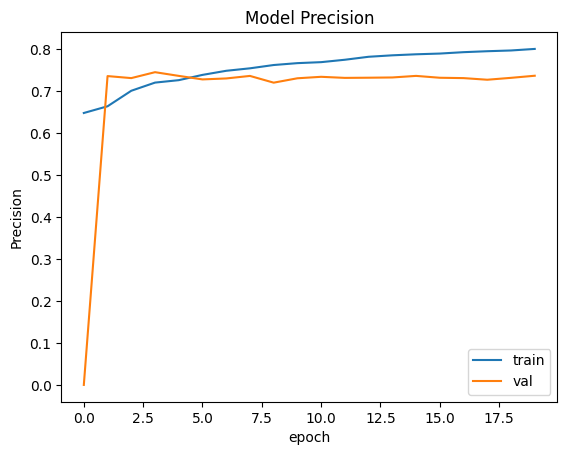

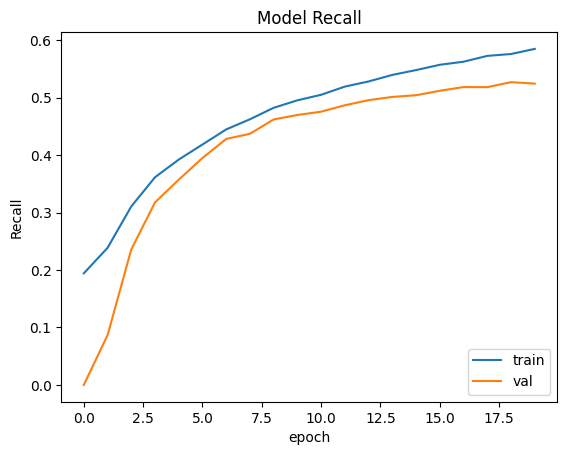

79/79 [==============================] - 3s 15ms/step


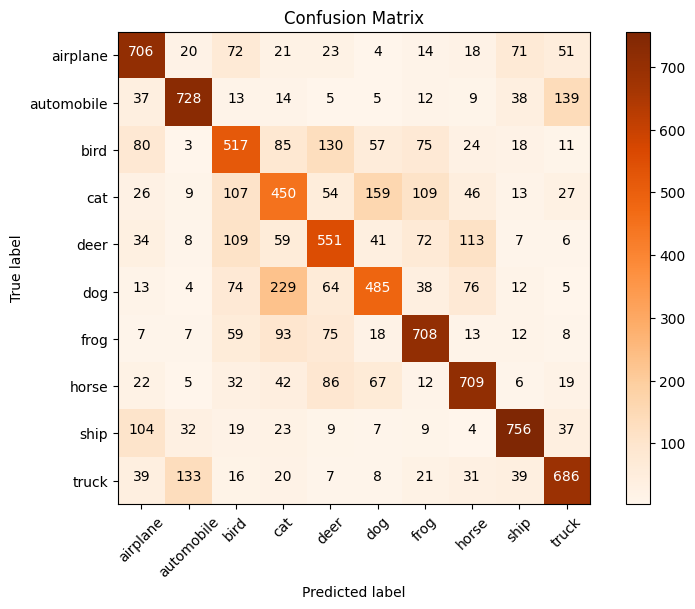

79/79 [==============================] - 1s 17ms/step - loss: 1.0472 - accuracy: 0.6296 - precision: 0.7379 - recall: 0.5264
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and COS Learning Rate:

Test set Loss = 1.04721
Test set Accuracy = 0.63
Test set Precision = 0.74
Test set Recall = 0.53
Test set F1 Score = 0.61


In [260]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and COS Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))